### Import libraries and data
First import necessary libraries

In [1]:
#libraries import
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
#setting options
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set_theme(style='whitegrid')
pd.set_option('display.max_columns', 48)

Load dataset and check column list

In [2]:
#%% Load dataset
df = pd.read_csv('diabetic_data.csv', encoding='ISO-8859-1')
print(df.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


### Quick data check

In [3]:
df.head()
df.describe()
df.info()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,...,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,...,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,...,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

### Data Cleaning and Exploration

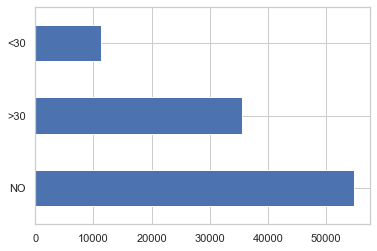

In [4]:
df['readmitted'].value_counts().plot(kind='barh')

In [5]:
df.loc[df['readmitted'].isin(['>30', 'NO']), 'readmitted'] = 'Other'
df['readmitted'] = df['readmitted'].astype('category')

The goal is to detect only the early readmission so 'NO' and '>30' will be grouped together into a category 'Other'

Probability of being readmitted in less than 30 days is: 11.16%


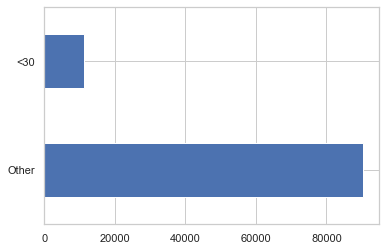

In [6]:
df['readmitted'].value_counts().plot(kind='barh')
base = np.sum(df['readmitted']=='<30')/len(df['readmitted'])
print("Probability of being readmitted in less than 30 days is: {:.2f}%".format(100*base))

The dependent variable is highly imbalanced, so metrics other than standard score have to be used.

Now, let's check every independent variable separetly.

In [7]:
np.sum(df['encounter_id'].value_counts()>1)

0

Encounter id is a unique number with no value for classification.

In [8]:
df['patient_nbr'].describe()
pat_uniq = df['patient_nbr'].unique().sum()
pat_nbr_ct = df['patient_nbr'].value_counts()
pat_nbr_more = len(pat_nbr_ct[pat_nbr_ct>1])
print("Percent of patient that were hospitalized more than once: {:.8f}%".format(pat_nbr_more/pat_uniq*100))

count    1.017660e+05
mean     5.433040e+07
std      3.869636e+07
min      1.350000e+02
25%      2.341322e+07
50%      4.550514e+07
75%      8.754595e+07
max      1.895026e+08
Name: patient_nbr, dtype: float64

Percent of patient that were hospitalized more than once: 0.00000043%


In [9]:
#Example of a patient hospitalized more than once
most_often_hospitalized = df['patient_nbr'].value_counts().index[0]
df[df['patient_nbr']==most_often_hospitalized]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,...,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
38307,119039172,88785891,Caucasian,Female,[20-30),?,1,1,7,1,OG,Emergency/Trauma,32,0,10,0,0,0,250.13,244,490,3,None,None,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,Other
40252,125094312,88785891,Caucasian,Female,[20-30),?,1,1,7,1,BC,Emergency/Trauma,10,0,10,1,0,2,250.11,244,?,2,None,None,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,<30
40661,126171582,88785891,Caucasian,Female,[20-30),?,1,1,7,5,BC,Emergency/Trauma,35,0,15,1,0,3,250.13,536,V58,6,None,None,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,Other
44515,137245596,88785891,Caucasian,Female,[20-30),?,3,1,7,2,SP,Surgery-General,1,0,8,1,0,5,250.11,465,244,3,None,None,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
45147,139425576,88785891,Caucasian,Female,[20-30),?,1,1,7,2,BC,Emergency/Trauma,32,0,4,1,0,6,250.11,V58,V15,9,None,None,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
45986,141994242,88785891,Caucasian,Female,[20-30),?,2,1,7,4,BC,Emergency/Trauma,8,0,14,1,0,7,250.1,276,276,9,None,None,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
50167,150986298,88785891,Caucasian,Female,[20-30),?,2,1,7,1,BC,Emergency/Trauma,2,0,9,4,1,9,8,250.01,V09,7,None,None,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
50393,151413846,88785891,Caucasian,Female,[20-30),?,1,1,7,4,SP,Emergency/Trauma,64,0,19,4,1,9,250.11,305,V58,6,None,None,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
50773,152188656,88785891,Caucasian,Female,[20-30),?,2,7,7,1,BC,Surgery-General,33,0,10,4,1,10,250.11,244,V15,6,None,None,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
51519,153558456,88785891,Caucasian,Female,[20-30),?,2,1,7,1,BC,Emergency/Trauma,35,0,10,3,1,11,250.11,V15,V58,4,None,None,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30


There is no Nan and all values seem to be of correct form. Some patients were hospitalized more than once, which may result in data dependence so only the first hospitalization of a given patient will be kept.

In [10]:
df.drop_duplicates(subset=['patient_nbr'], inplace=True)

Encounter_id and patient_nbr are no longer needed.

In [11]:
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

Let's check other features.

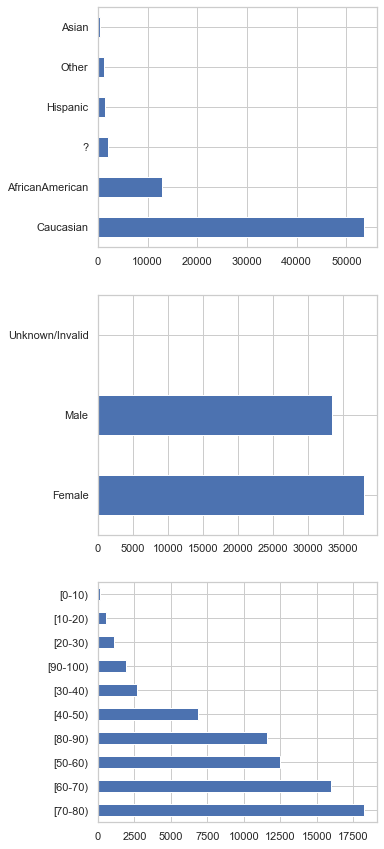

In [12]:
fig, axs = plt.subplots(3,1, figsize=(5,15))
df['race'].value_counts().plot(kind='barh', ax=axs[0])
df['gender'].value_counts().plot(kind='barh', ax=axs[1])
df['age'].value_counts().plot(kind='barh', ax=axs[2])

These features seem to be mostly alright. Category '?' from race will be changed to Unknown for consistency and entries with 'Unknown/Invalid' in gender will be removed.

In [13]:
df.loc[df['race']=='?', 'race'] = 'Unknown'
df = df[df['gender']!='Unknown/Invalid']
df.loc[:,'race'] = df['race'].astype('category')
df.loc[:,'gender'] = df['gender'].astype('category')
df.loc[:,'age'] = df['age'].astype('category').cat.as_ordered()

[Text(0, 0, 'AfricanAmerican'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Caucasian'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Unknown')]

[Text(0, 0, '[0-10)'),
 Text(0, 0, '[10-20)'),
 Text(0, 0, '[20-30)'),
 Text(0, 0, '[30-40)'),
 Text(0, 0, '[40-50)'),
 Text(0, 0, '[50-60)'),
 Text(0, 0, '[60-70)'),
 Text(0, 0, '[70-80)'),
 Text(0, 0, '[80-90)'),
 Text(0, 0, '[90-100)')]

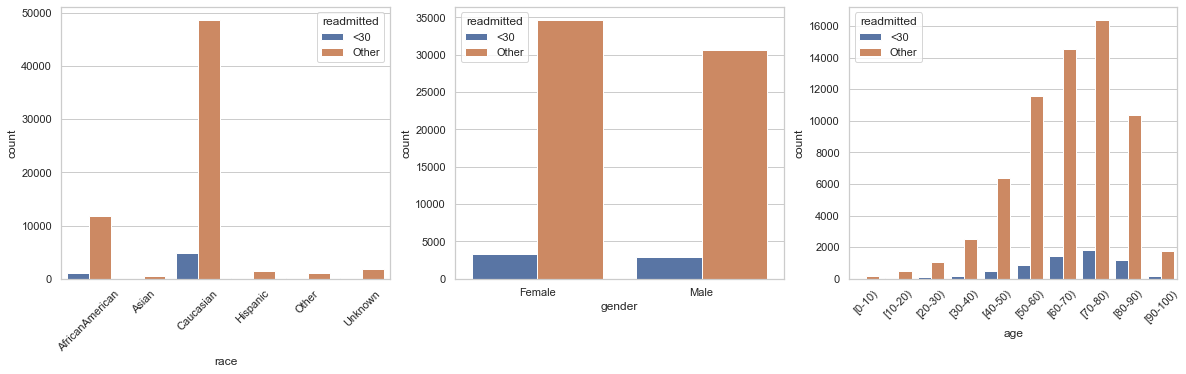

In [14]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
sns.countplot(data=df, x='race', hue='readmitted', ax=axs[0])
sns.countplot(data=df, x='gender', hue='readmitted', ax=axs[1])
sns.countplot(data=df, x='age', hue='readmitted', ax=axs[2])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45)

- Mostly african american and caucasian race are being treated, which is probably caused by their bigger number in American society.  
- More women is treated than man that may be due to the fact that woman are more prone to diabetics complications.  
- With increase of the age more people is being treated with peak at the age range of 70-80.  

Let's see the chance of getting readmitted early vs. these categories

In [15]:
def PlotChance(df, feat, out, feat_name=None, out_name=None, ax=None, print_tab = False):
    #make count per class
    tab = pd.crosstab(df[feat], df[out])
    #change it to percent
    tab_pc = tab.T.div(tab.T.sum()).T
    if print_tab:
        print(tab_pc)
    if feat_name == None:
        feat_name = feat
    if out_name == None:
        out_name = out
    if ax == None:
        fig, ax = plt.subplots()
    tab_pc.plot(kind='barh', stacked=True, width=1.0, alpha=0.8, ax=ax)
    ax.set_xlabel('Probability')
    ax.set_xlim(0.,1.)
    ax.set_ylabel('{:s}'.format(feat_name))
    y_lim = ax.get_ylim()
    ax.set_ylim(y_lim[0]+0.25, y_lim[1]-0.25)
    ax.legend()
    ax.set_title("{:s} vs. {:s}".format(feat_name, out_name))

Proportion of early readmissions in a given category:


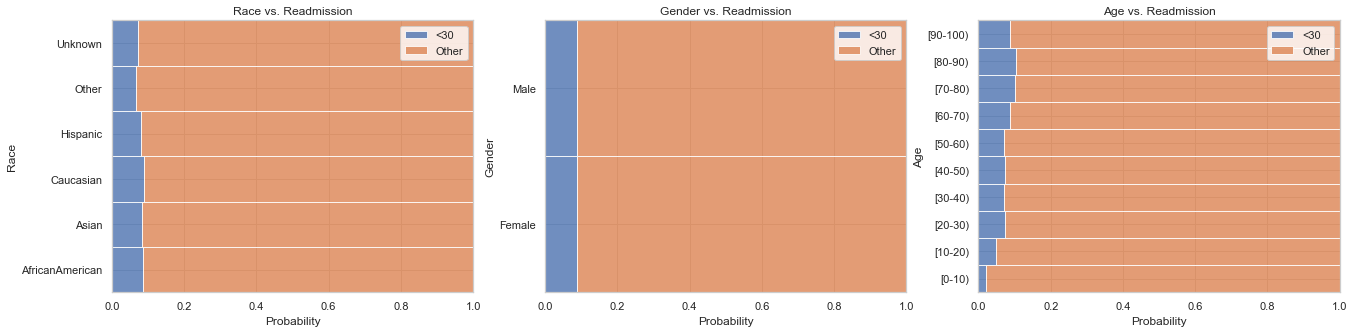

In [16]:
print("Proportion of early readmissions in a given category:")
fig, axs = plt.subplots(1,3, figsize=(22,5))
PlotChance(df,'race','readmitted', 'Race', 'Readmission', ax=axs[0])
PlotChance(df,'gender','readmitted', 'Gender', 'Readmission', ax=axs[1])
PlotChance(df,'age','readmitted', 'Age', 'Readmission', ax=axs[2])

Distribution of readmissions as a function of age:


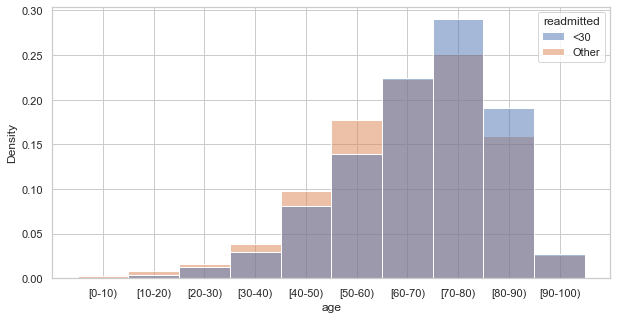

In [17]:
print("Distribution of readmissions as a function of age:")
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
sns.histplot(df, x='age', hue='readmitted', stat='density', common_norm=False, linewidth=1, ax=ax1)

Plots indicate Caucasian and African American race have biggest chance of getting readmitted.  
Reamission is gender independent and chances of getting readmitted increase with age.
Time to check if the output is independent of given features. For that statistical test will be used: Chi2 for categorical data, and Cochran-Armitage for categorical ordinal data.

In [18]:
def IndependenceTest(df, feature, outcome, order=False):
    """
    Independence testing function for categorical variables.
    Returns:
        0 - no dependence
        1 - dependence
       -1 - one of the samples too small
    """
    ret = 0
    print("\nIndependece test for variables {:s} and {:s}".format(feature, outcome))
    tab = pd.crosstab(df[feature], df[outcome])
    df_check = tab[tab<6]
    if np.any(tab[tab<6].notnull()):
        print("Independence test should not be performed because not all frequencies are bigger than 5:")
        ret = -1
    table = sm.stats.Table(tab)
    print(table.table_orig)
    if tab.index.dtype.name == 'category':
        order = tab.index.ordered
        cat_l = tab.index.categories
    else:
        cat_l = tab.index
    if not order:
        print("Variable {:s} is not ordered.".format(feature))
        rslt =  table.test_nominal_association()
        #singificance assumed at 0.05
        dof = rslt.df
        prob = 0.95
        thresh = chi2.ppf(prob, dof)
        print("Result for nominal (chi2) association.")
        print("chi2_stat: {:e}, chi2_thresh: {:e}, dof: {:e}, p-value: {:e}".format(rslt.statistic,
                                                    thresh, dof, rslt.pvalue))
        if rslt.pvalue < 0.05:
            if ret == 0:
                return 1
            else:
                return ret
        else:
            if ret == 0:
                return 1
            else:
                return ret
    else:
        print("Variable {:s} is ordered.".format(feature))
        print("Order:")
        print(', '.join('{}: {}'.format(*k) for k in enumerate(cat_l)))
        rslt = table.test_ordinal_association()
        print("Result for ordinal (Cochran-Armitage) association {:e}".format(rslt.pvalue))
        print("CA_stat: {:e}, H0_mean: {:e}, H0_sd: {:e}, z-score: {:e}, p-value: {:e}".format(rslt.statistic,
                                                    rslt.null_mean, rslt.null_sd, rslt.zscore, rslt.pvalue))
        if rslt.pvalue < 0.05:
            if ret == 0:
                return 1
            else:
                return ret
        else:
            if ret == 0:
                return 1
            else:
                return ret

In [19]:
IndependenceTest(df, 'race', 'readmitted')
IndependenceTest(df, 'gender', 'readmitted')
IndependenceTest(df, 'age', 'readmitted')


Independece test for variables race and readmitted
readmitted        <30  Other
race                        
AfricanAmerican  1093  11794
Asian              41    456
Caucasian        4816  48675
Hispanic          122   1395
Other              80   1097
Unknown           141   1805
Variable race is not ordered.
Result for nominal (chi2) association.
chi2_stat: 1.740321e+01, chi2_thresh: 1.107050e+01, dof: 5.000000e+00, p-value: 3.795298e-03


1


Independece test for variables gender and readmitted
readmitted   <30  Other
gender                 
Female      3370  34655
Male        2923  30567
Variable gender is not ordered.
Result for nominal (chi2) association.
chi2_stat: 4.020653e-01, chi2_thresh: 3.841459e+00, dof: 1.000000e+00, p-value: 5.260246e-01


1


Independece test for variables age and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted   <30  Other
age                    
[0-10)         3    151
[10-20)       26    509
[20-30)       83   1044
[30-40)      188   2511
[40-50)      507   6371
[50-60)      879  11587
[60-70)     1414  14545
[70-80)     1824  16384
[80-90)     1201  10388
[90-100)     168   1732
Variable age is ordered.
Order:
0: [0-10), 1: [10-20), 2: [20-30), 3: [30-40), 4: [40-50), 5: [50-60), 6: [60-70), 7: [70-80), 8: [80-90), 9: [90-100)
Result for ordinal (Cochran-Armitage) association 3.147436e-30
CA_stat: 3.941990e+05, H0_mean: 3.955819e+05, H0_sd: 1.210483e+02, z-score: -1.142470e+01, p-value: 3.147436e-30


-1

The hypothesis H_0 that there is no correlation between race and readmission can be rejected.
H_0 cannot be rejected for gender and altough for age the smallest frequency is 3, p-value is small enough to indicate that H_0 is not true.
Let's drop gender.

In [20]:
df.drop(['gender'], axis=1, inplace=True)

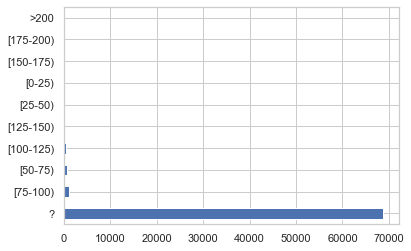

In [21]:
df['weight'].value_counts().plot(kind='barh')

Weight is mostly Nan so it can be dropped.

In [22]:
df.drop(['weight'], axis=1, inplace=True)

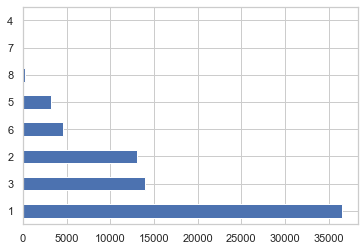

In [23]:
#Documentation states that:
# 1.Emergency; 2.Urgent; 3.Elective; 4.Newborn
# 5.Not Available; 6.NULL; 7.Trauma Center; 8.Not Mapped
df['admission_type_id'].value_counts().plot(kind='barh')

In [24]:
#New categories:
#1.Emergency, 2.Urgent, 3.Electivee, 4.Other, 5.Unknown
df.loc[df['admission_type_id'].isin([4,7]), 'admission_type_id'] = 4
#df = df.loc[~df['admission_type_id'].isin([4])]
df.loc[df['admission_type_id'].isin([5,6,8]), 'admission_type_id'] = 5
df.loc[:,'admission_type_id'] = df['admission_type_id'].astype('category')

Text(0.5, 1.0, 'Count of readmission by admission_id')


Independece test for variables admission_type_id and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted          <30  Other
admission_type_id             
1                  3262  33226
2                  1149  11879
3                  1143  12773
4                     1     29
5                   738   7315
Variable admission_type_id is not ordered.
Result for nominal (chi2) association.
chi2_stat: 9.308506e+00, chi2_thresh: 9.487729e+00, dof: 4.000000e+00, p-value: 5.383427e-02


-1

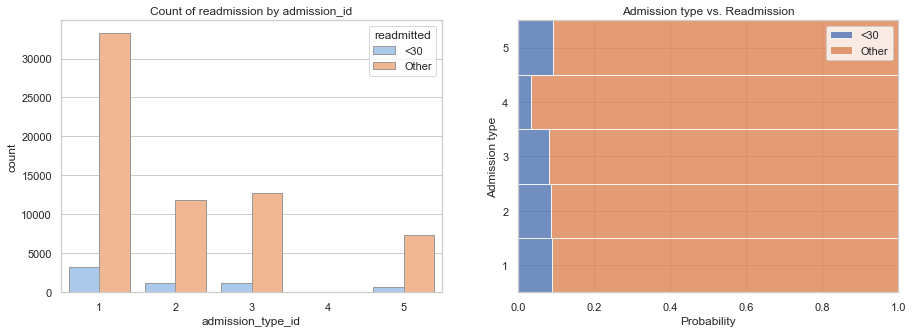

In [25]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='admission_type_id', hue='readmitted', palette='pastel', edgecolor='.6',
            data=df, ax=axs[0])
axs[0].set_title("Count of readmission by admission_id")
PlotChance(df,'admission_type_id','readmitted', 'Admission type', 'Readmission', ax=axs[1])
IndependenceTest(df, 'admission_type_id', 'readmitted')

Smallest frequency equals 1 which is too little to perform chi2 test and p-value is above 0.05.

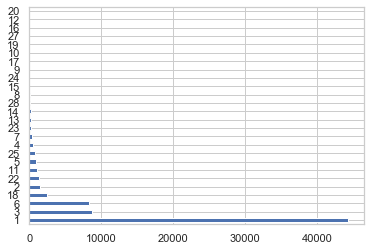

In [26]:
df['discharge_disposition_id'].value_counts().plot(kind='barh')

Full list of categories is available at: IDs_mapping.csv
The number of categories is susbtantial but many of the categories seem that either should be grouped or dropped. 
- Patients that were discharged to hospicium or died will be removed. Their return chance is small or close to zero and they would bias the analysis. Cat. numbers: 11, 13, 14, 19, 20, 21.  
- Cat. 1 can be grouped as discharged to home.  
- All other cat. indicate continuation of treatment in some way and many categories are small when compared to the first category. They will be all grouped in category 'Other' and prescribed number 2. Cat. numbers: 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 16, 17, 22, 23, 24, 27, 28, 29, 30.  
- Also all Nan will be grouped in category 'Unknown' and prescirbed number 3. Cat. numbers: 18, 25, 26.  

In [27]:
df = df.loc[~df['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])]
df.loc[df['discharge_disposition_id'].isin([2,3,4,5,6,7,8,9,10,12,15,16,17,22,23,24,27,28,29,30]), 'discharge_disposition_id'] = 2
df.loc[df['discharge_disposition_id'].isin([18,25,26]), 'discharge_disposition_id'] = 3
df.loc[:,'discharge_disposition_id'] = df['discharge_disposition_id'].astype('category')

New categories: 1.'Discharged to home'; 2.'Other'; 3.'Unknown'.

Text(0.5, 1.0, 'Count of readmission by discharge_id')


Independece test for variables discharge_disposition_id and readmitted
readmitted                 <30  Other
discharge_disposition_id             
1                         3078  41237
2                         2900  19503
3                          299   2953
Variable discharge_disposition_id is not ordered.
Result for nominal (chi2) association.
chi2_stat: 6.559708e+02, chi2_thresh: 5.991465e+00, dof: 2.000000e+00, p-value: 0.000000e+00


1

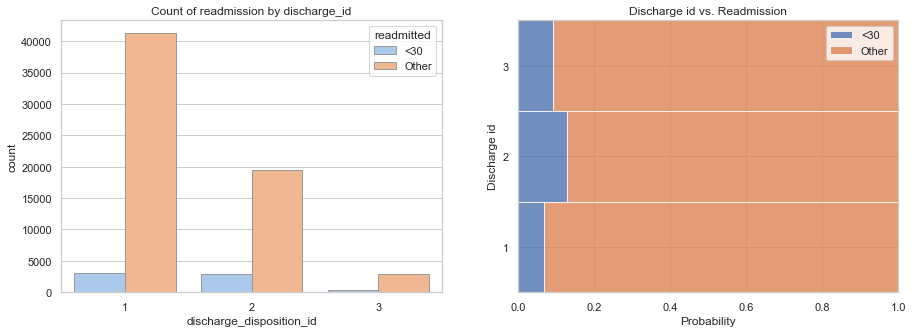

In [28]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='discharge_disposition_id', hue='readmitted', palette='pastel', edgecolor='.6',
            data=df, ax=axs[0])
axs[0].set_title("Count of readmission by discharge_id")
PlotChance(df,'discharge_disposition_id','readmitted', 'Discharge id', 'Readmission', ax=axs[1])
IndependenceTest(df, 'discharge_disposition_id', 'readmitted')

H_0 can be rejected.

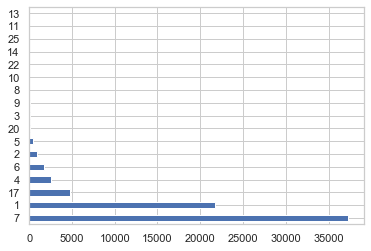

In [29]:
df['admission_source_id'].value_counts().plot(kind='barh')

- The dominant category is 'Emergency Room' (7) and it is followed by 'Physicial referal' (1).  
- There is also few Nan that will be grouped together. Cat. number: 9, 15, 17, 20, 21.  
- Other categories will be grouped together. Cat. number: 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 18, 19, 22, 23, 24, 25, 26

In [30]:
df.loc[df['admission_source_id'].isin([2,3,4,5,6,8,10,11,12,13,14,18,19,22,23,24,25,26]), 'admission_source_id'] = 3
df.loc[df['admission_source_id'].isin([9,15,17,20,21]), 'admission_source_id'] = 4
df.loc[df['admission_source_id'].isin([7]), 'admission_source_id'] = 2
df.loc[:,'admission_source_id'] = df['admission_source_id'].astype('category')

New categories: 1.'Physical regeral'; 2.'Emergency Room'; 3.'Other'; 4.'Unknown'.

Text(0.5, 1.0, 'Count of readmission by admission_source_id')


Independece test for variables admission_source_id and readmitted
readmitted            <30  Other
admission_source_id             
1                    1871  19874
2                    3446  33812
3                     509   5390
4                     451   4617
Variable admission_source_id is not ordered.
Result for nominal (chi2) association.
chi2_stat: 7.986844e+00, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 4.628439e-02


1

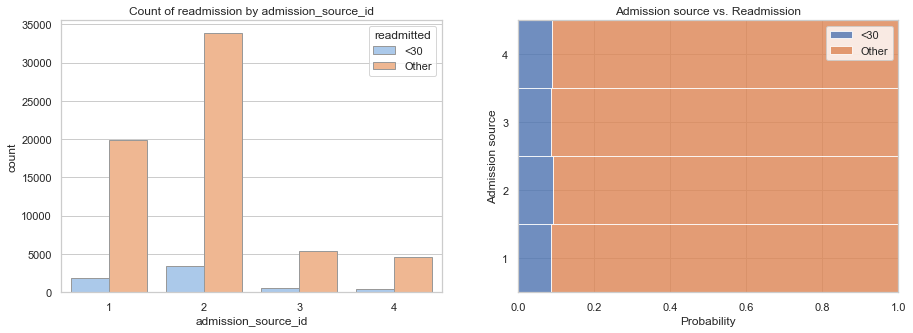

In [31]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='admission_source_id', hue='readmitted', palette='pastel', edgecolor='.6',
            data=df, ax=axs[0])
axs[0].set_title("Count of readmission by admission_source_id")
PlotChance(df,'admission_source_id','readmitted', 'Admission source', 'Readmission', ax=axs[1])
IndependenceTest(df, 'admission_source_id', 'readmitted')

Again H_0 can be rejected.

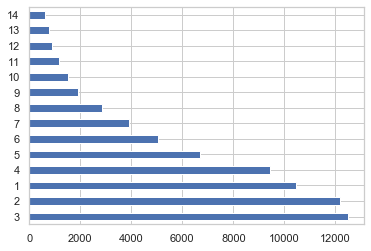

In [32]:
df['time_in_hospital'].value_counts().plot(kind='barh')

Text(0.5, 1.0, 'Count of readmission by admission_source_id')


Independece test for variables time_in_hospital and readmitted
readmitted         <30  Other
time_in_hospital             
1                  685   9783
2                  933  11245
3                 1022  11465
4                  835   8588
5                  654   6043
6                  550   4500
7                  446   3456
8                  350   2492
9                  235   1676
10                 185   1321
11                 114   1074
12                 114    801
13                  80    681
14                  74    568
Variable time_in_hospital is ordered.
Order:
0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14
Result for ordinal (Cochran-Armitage) association 9.478996e-50
CA_stat: 2.051950e+05, H0_mean: 2.084837e+05, H0_sd: 2.217744e+02, z-score: -1.482925e+01, p-value: 9.478996e-50


1

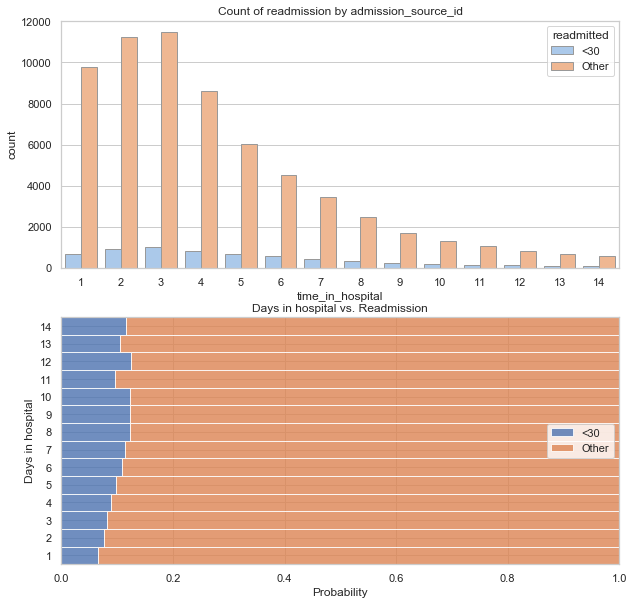

In [33]:
fig, axs = plt.subplots(2,1, figsize=(10,10))
sns.countplot(x='time_in_hospital', hue='readmitted', palette='pastel', edgecolor='.6',
            data=df, ax=axs[0])
axs[0].set_title("Count of readmission by admission_source_id")
PlotChance(df,'time_in_hospital','readmitted', 'Days in hospital', 'Readmission', ax=axs[1])
IndependenceTest(df, 'time_in_hospital', 'readmitted', order=True)

Again H_0 can be rejected.  
Probability of getting readmitted increases up to 8 days spend in hospital. After 10 days the trend is no longer clear.

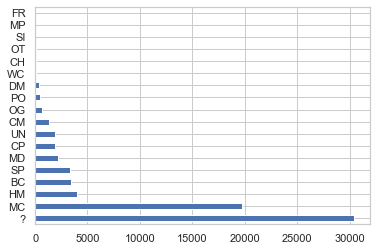

In [34]:
df['payer_code'].value_counts().plot(kind='barh')

Unknown '?' is dominant and 'payer_code' should have no influence on outcome, and therefore it is dropped.

In [35]:
df.drop(['payer_code'], axis=1, inplace=True)

71

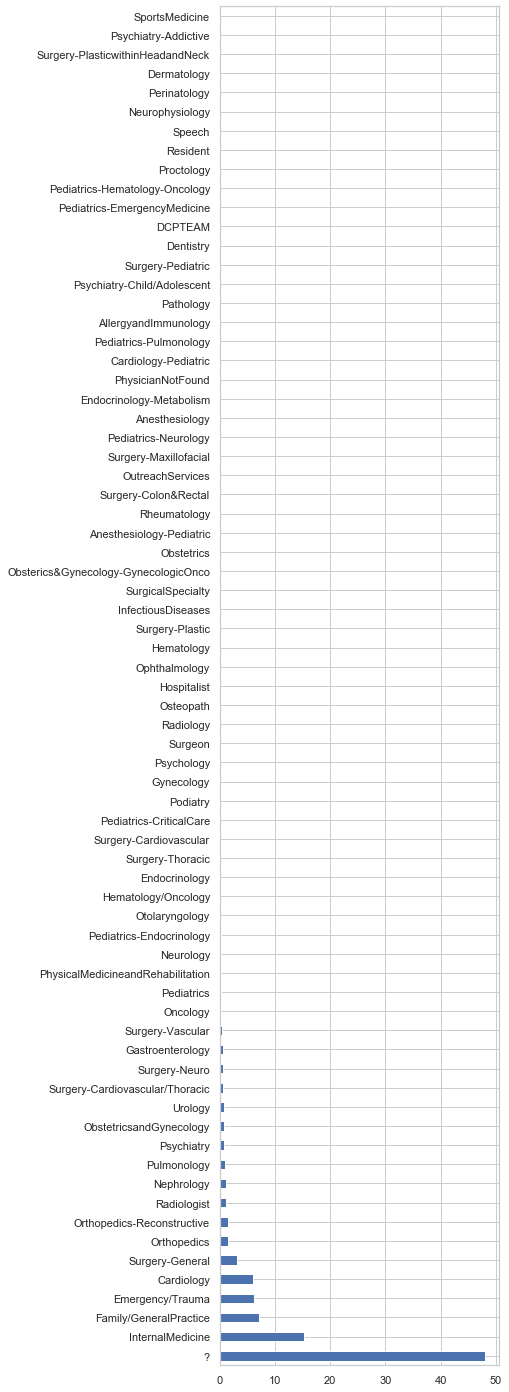

In [36]:
med_spec_val = df['medical_specialty'].value_counts()
len(med_spec_val)
med_spec_prc = (med_spec_val/len(df['medical_specialty']))*100
med_spec_prc.plot(kind='barh', figsize=(5,25))

Let's put a cap on medical speciality and group all below or equal to 100 to separate group: 'Other'.

In [37]:
med_spec_val_ov100 = med_spec_val[med_spec_val>100]
df.loc[~df['medical_specialty'].isin(med_spec_val_ov100.index.values), 'medical_specialty']='Other'
df.loc[df['medical_specialty'].isin(['?']), 'medical_specialty']='Unknown'
df.loc[:,'medical_specialty'] = df['medical_specialty'].astype('category')


Independece test for variables medical_specialty and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted                          <30  Other
medical_specialty                             
Cardiology                          302   3904
Emergency/Trauma                    344   4049
Family/GeneralPractice              485   4493
Gastroenterology                     40    343
Hematology/Oncology                  22     87
InternalMedicine                   1039   9602
Nephrology                           88    709
Neurology                            11    156
ObstetricsandGynecology              22    571
Oncology                             37    168
Orthopedics                         112   1016
Orthopedics-Reconstructive           69    972
Other                                61    928
Otolaryngology                        2    108
Pediatrics                           11    184
Pediatrics-Endocrinology              0    147


-1

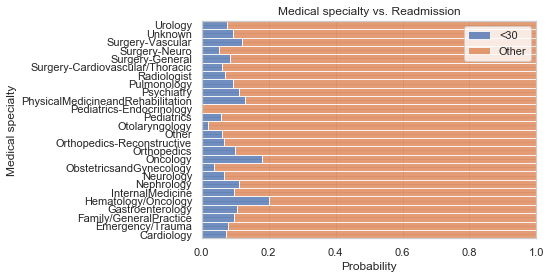

In [38]:
PlotChance(df,'medical_specialty','readmitted', 'Medical specialty', 'Readmission')
IndependenceTest(df, 'medical_specialty', 'readmitted')

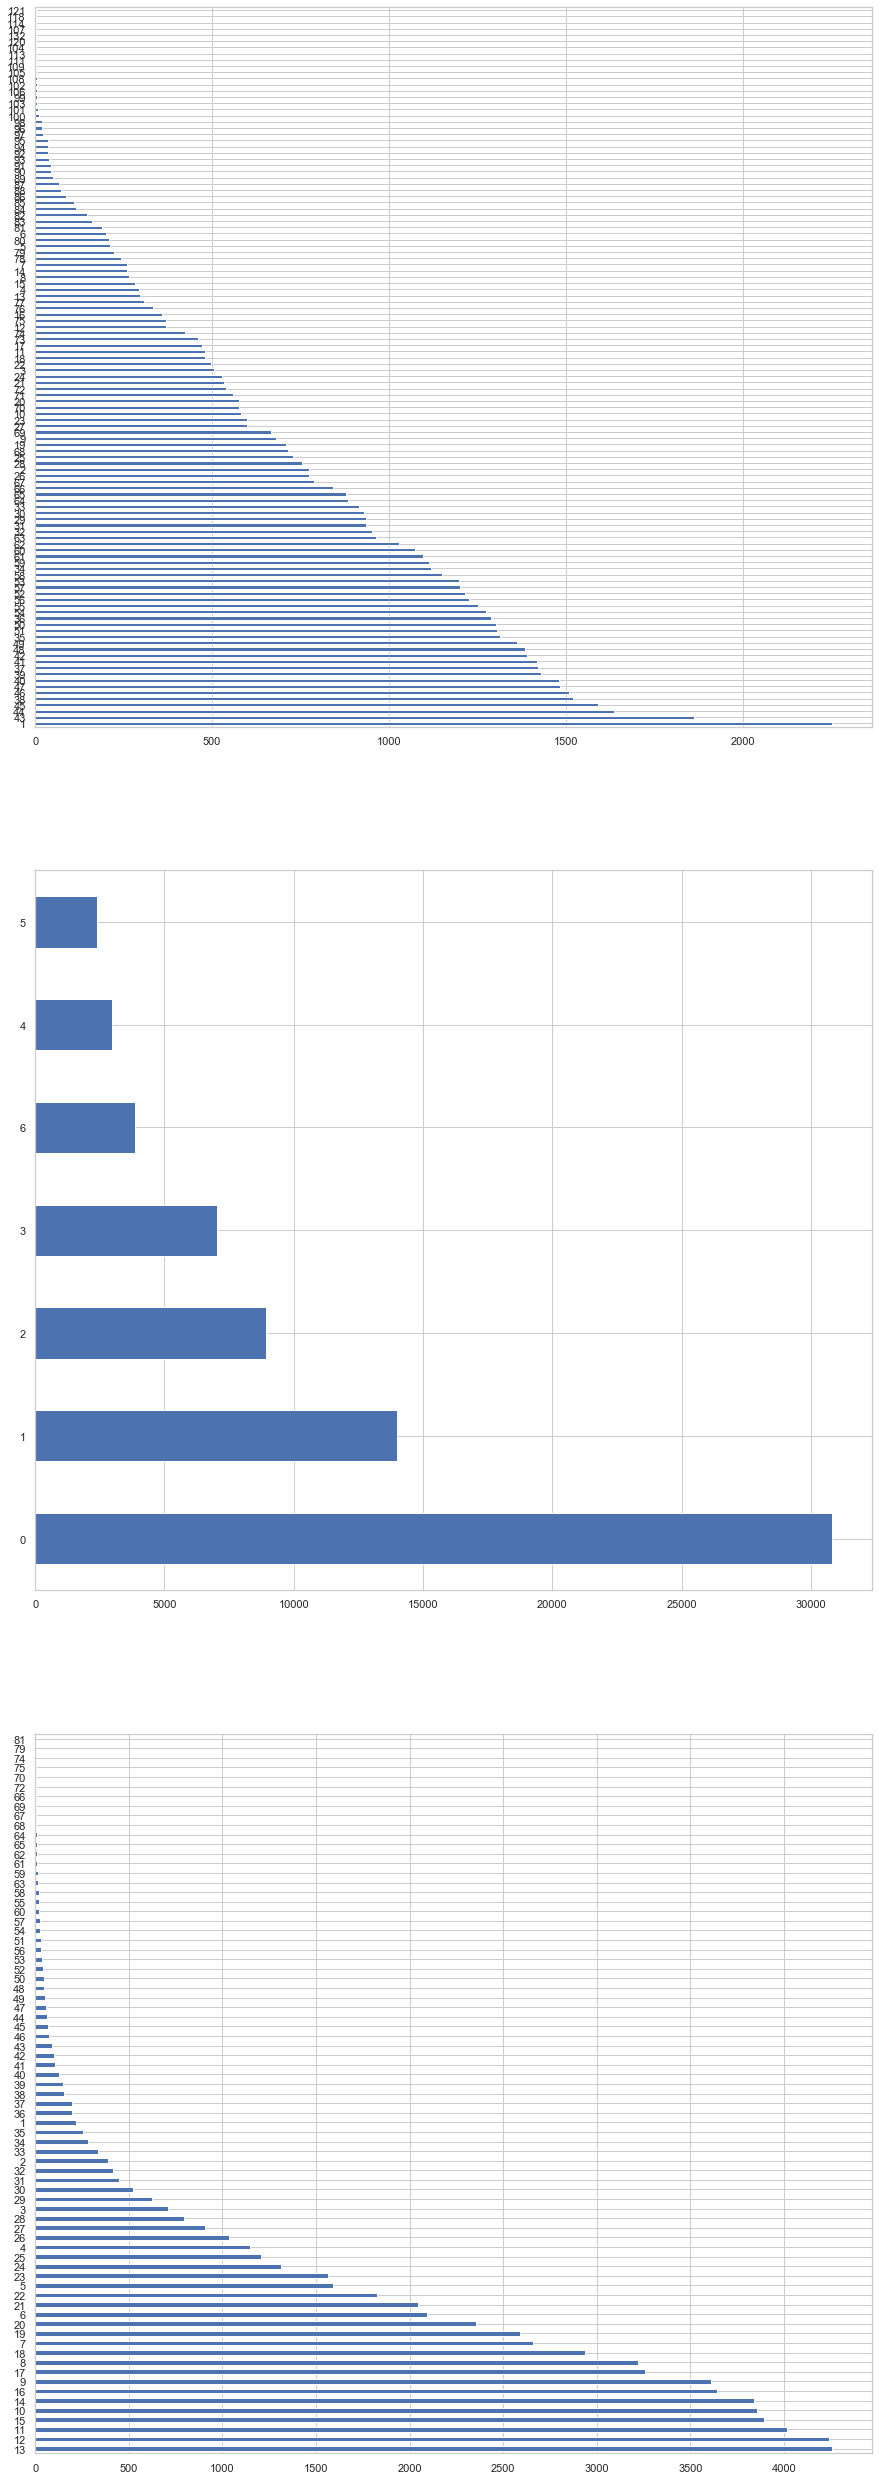

In [39]:
fig, axs = plt.subplots(3,1, figsize=(15,45))
df['num_lab_procedures'].value_counts().plot(kind='barh', ax=axs[0])
df['num_procedures'].value_counts().plot(kind='barh', ax=axs[1])
df['num_medications'].value_counts().plot(kind='barh', ax=axs[2])

In [40]:
IndependenceTest(df, 'num_lab_procedures', 'readmitted', order=True)
IndependenceTest(df, 'num_procedures', 'readmitted', order=True)
IndependenceTest(df, 'num_medications', 'readmitted', order=True)


Independece test for variables num_lab_procedures and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted          <30  Other
num_lab_procedures            
1                   142   2112
2                    73    700
3                    35    471
4                    15    279
5                    16    196
...                 ...    ...
114                   0      1
118                   0      1
120                   0      1
121                   0      1
132                   1      0

[116 rows x 2 columns]
Variable num_lab_procedures is ordered.
Order:
0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49

-1


Independece test for variables num_procedures and readmitted
readmitted       <30  Other
num_procedures             
0               2690  28143
1               1343  12650
2                788   8150
3                647   6374
4                285   2676
5                201   2178
6                323   3522
Variable num_procedures is ordered.
Order:
0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6
Result for ordinal (Cochran-Armitage) association 9.714555e-01
CA_stat: 9.079800e+04, H0_mean: 9.079325e+04, H0_sd: 1.328208e+02, z-score: 3.578286e-02, p-value: 9.714555e-01


1


Independece test for variables num_medications and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted       <30  Other
num_medications            
1                  9    207
2                 28    363
3                 39    669
4                 67   1079
5                 95   1498
...              ...    ...
72                 2      0
74                 0      1
75                 0      2
79                 0      1
81                 1      0

[75 rows x 2 columns]
Variable num_medications is ordered.
Order:
0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 

-1

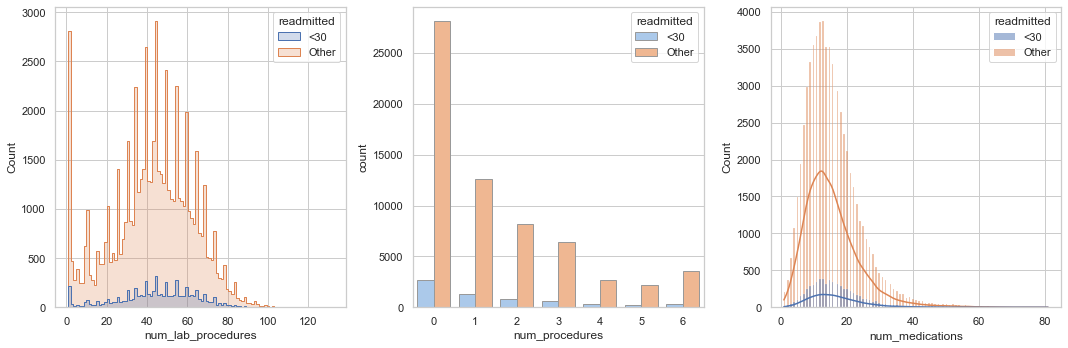

In [41]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.histplot(x='num_lab_procedures', data=df, hue='readmitted', element='step', ax=axs[0])
sns.countplot(x='num_procedures', hue='readmitted', palette='pastel', edgecolor='.6',
            data=df, ax=axs[1])
sns.histplot(x='num_medications', data=df, hue='readmitted', ax=axs[2], kde=True)
fig.tight_layout()

**Number of laboratory procedures:**  
There are two peaks. First mode is at 0 and second around 45.  
**Number of procedures:**  
Log-normal distribution.  
**Number of medications:**  
Rightly skewed normal distribution.

Text(0.5, 1.0, 'Distribution of lab procedures number')

Text(0.5, 1.0, 'Avg. number of procedures per days in hospital')

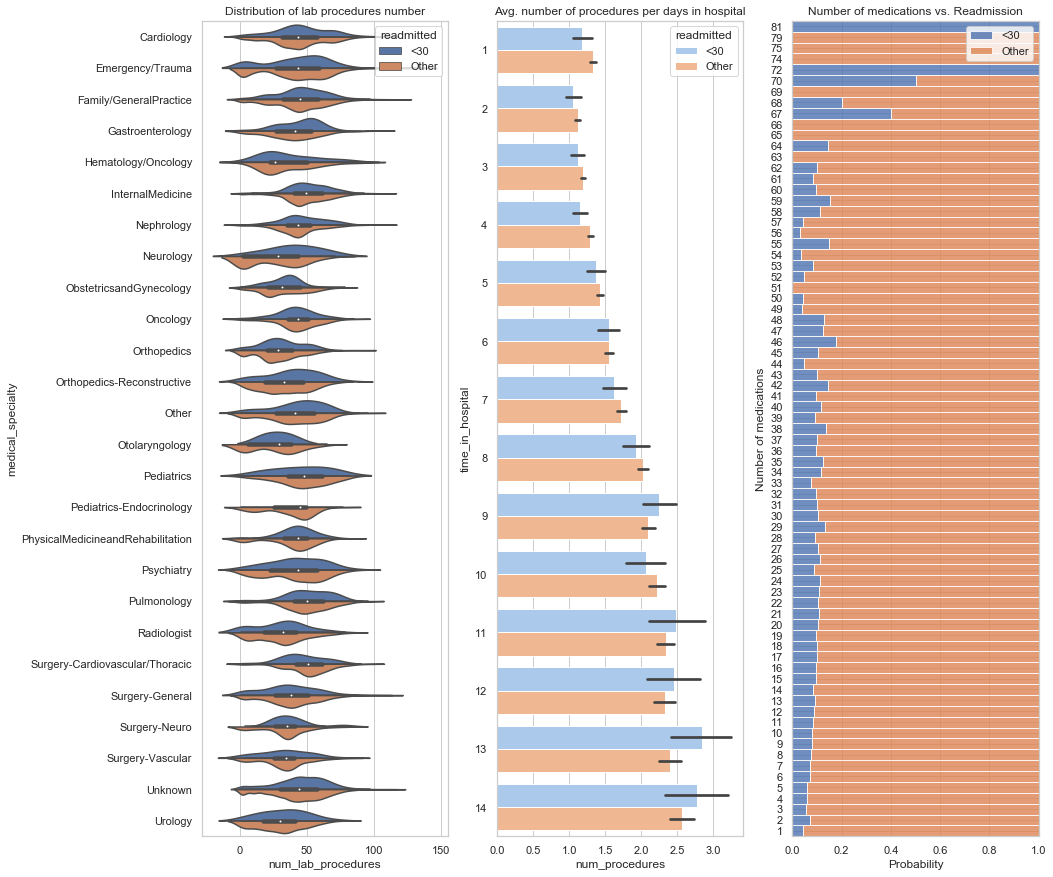

In [42]:
#Some fun with plots
fig, axs = plt.subplots(1,3, figsize=(15,15))
sns.violinplot(data = df, y='medical_specialty', x='num_lab_procedures', hue='readmitted',
            split=True, ax=axs[0])
axs[0].set_title("Distribution of lab procedures number")
sns.barplot(x='num_procedures', y='time_in_hospital', hue='readmitted', palette='pastel', orient='h',
            data=df, ax=axs[1]) 
#sns.boxplot(x='num_medications', y='age', hue='readmittd', palette='pastel', orient='h',
#            data=df, ax=axs[2])
axs[1].set_title("Avg. number of procedures per days in hospital")
PlotChance(df,'num_medications','readmitted', 'Number of medications', 'Readmission', ax=axs[2])

1. Distribution vary highly based on the type of medical specialty.
2. There is a linear dependency between the time spent in a hospital  and number of performed procedures.
3. Chances of getting readmitted increase with number of medications up to 29. Later the trend isn't clear which may be dictated by small number of samples for number is this range (>30).

In [43]:
df['number_emergency'].value_counts()

0     64870
1      3882
2       789
3       242
4        95
5        32
6        26
8         9
7         8
10        5
9         4
11        2
37        1
13        1
16        1
20        1
25        1
42        1
Name: number_emergency, dtype: int64

Counts for values above 7 are small and setting cap on >7 would not affect the distribution so all values bigger or equal to 7 will be gathered to one group '>=7'.

In [44]:
df.loc[df['number_emergency']>7, 'number_emergency'] = 7
df.loc[:,'number_emergency'] = df['number_emergency'].astype('category').cat.as_ordered()

Text(0.5, 1.0, 'Count of readmission by number of emergency')


Independece test for variables number_emergency and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted         <30  Other
number_emergency             
0                 5664  59206
1                  437   3445
2                  106    683
3                   31    211
4                   23     72
5                    5     27
6                    6     20
7                    5     29
Variable number_emergency is ordered.
Order:
0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7
Result for ordinal (Cochran-Armitage) association 1.362563e-18
CA_stat: 6.190000e+03, H0_mean: 6.481266e+03, H0_sd: 3.309664e+01, z-score: -8.800460e+00, p-value: 1.362563e-18


-1

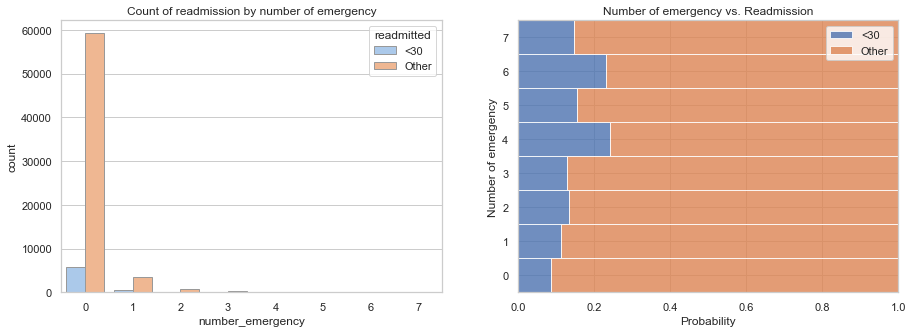

In [45]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='number_emergency', hue='readmitted', palette='pastel', edgecolor='.6',
            data=df, ax=axs[0])
axs[0].set_title("Count of readmission by number of emergency")
PlotChance(df,'number_emergency','readmitted', 'Number of emergency', 'Readmission', ax=axs[1])
IndependenceTest(df, 'number_emergency', 'readmitted')

H_0 can be rejected.

0     60851
1      4779
2      1981
3      1096
4       574
5       278
6       122
7        72
8        56
9        36
10       28
11       18
12       13
13       13
15       10
14       10
16        7
17        4
20        3
18        2
22        2
24        2
27        2
33        2
36        1
19        1
21        1
23        1
25        1
26        1
29        1
35        1
42        1
Name: number_outpatient, dtype: int64

readmitted  number_outpatient
<30         0                     5349
            1                      495
            2                      204
            3                       95
            4                       66
            5                       31
            6                       11
            9                        8
            7                        7
            8                        3
            13                       2
            10                       1
            11                       1
            14                       1
            15                       1
            19                       1
            23                       1
Other       0                    55502
            1                     4284
            2                     1777
            3                     1001
            4                      508
            5                      247
            6                      111
            7                     

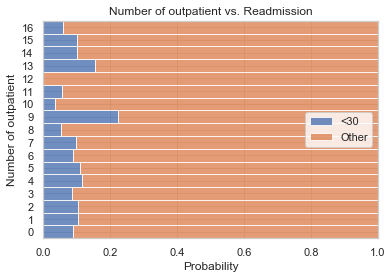

In [46]:
df['number_outpatient'].value_counts()
df.groupby('readmitted')['number_outpatient'].value_counts()
#cap number_outpatient at 16
df.loc[df['number_outpatient']>16, 'number_outpatient'] = 16
PlotChance(df,'number_outpatient','readmitted', 'Number of outpatient', 'Readmission')

0     61779
1      5794
2      1501
3       463
4       228
5       102
6        55
7        19
8        13
9         7
10        5
12        2
11        2
Name: number_inpatient, dtype: int64

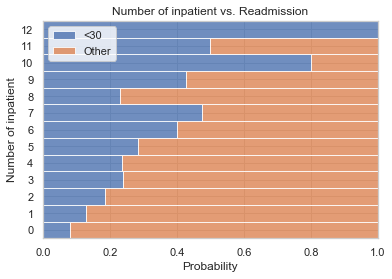

In [47]:
df['number_inpatient'].value_counts()
PlotChance(df,'number_inpatient','readmitted', 'Number of inpatient', 'Readmission')

Chances of beingin early readmitted increases largely with the number of inpatient admissions.

Now diagnosis will be decoded and grouped accordingly to ICD9.

In [48]:
# Diagnosis codes follow ICD9
diag_l = ['diag_1', 'diag_2', 'diag_3']
for cl in diag_l:
    len(df[cl].unique())
    df[cl].unique()

695

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '626', '295', '196', '250.6',
       '618', '182', '845', '423', '808', '250.4', '722', '250.11', '784',
       '707', '440', '151', '715', '564', '812', '997', '403', '38',
       '590', '556', '578', '250.32', '433', 'V58', '569', '185', '536',
       '255', '250.13', '599', '558', '574', '491', '560', '244',
       '250.03', '577', '730', '188', '824', '250.8', '332', '562', '291',
       '296', '510', '401', '263', '438', '70', '250.02', '493', '642',
       '625', '571', '738', '593', '250.42', '807', '456', '446', '575',
       '250.41', '820', '515', '780', '250.22', '995', '235', '250.82',
       '721', '787', '724', '282', '514', 'V55', '281', '250.33', '466',
       '435', '250.12', 'V53', '789', '566', '822', '191', '557', '

724

array(['?', '250.01', '250', '250.43', '157', '411', '492', '427', '198',
       '403', '288', '998', '507', '174', '425', '456', '401', '715',
       '496', '428', '585', '250.02', '410', '999', '996', '135', '244',
       '41', '571', '276', '599', '424', '491', '553', '707', '997',
       '286', '440', '493', '242', '70', 'V45', '250.03', '357', '511',
       '196', '396', '414', '250.52', '577', '535', '413', '285', '53',
       '780', '518', '150', '566', '250.6', '867', '486', 'V15', '8',
       '788', '340', '574', '581', '228', '530', '250.82', '786', '294',
       '567', '785', '512', '305', '729', '250.51', '280', '648', '560',
       '618', '444', '38', 'V10', '578', '277', '781', '250.42', '278',
       '426', '584', '462', '402', '153', '272', '733', '34', '881',
       '203', '250.41', '293', '245', '250.12', '558', '787', '342',
       '573', '626', '303', '250.53', '458', '710', '415', 'V42', '284',
       '569', '759', '112', '292', '435', '682', '290', '250.13',
     

757

array(['?', '255', 'V27', '403', '250', 'V45', '38', '486', '996', '197',
       '250.6', '427', '627', '414', '416', '714', '428', '582', 'V43',
       '250.01', '263', '250.42', '276', '482', '401', '250.41', '585',
       '781', '278', '998', '568', '682', '618', '250.02', '305', '707',
       '496', '715', '424', '518', '553', '794', '411', 'V42', '531',
       '511', '490', '562', '250.8', '599', '250.7', '250.52', '491',
       '581', '420', '8', '724', '730', '789', '131', '250.82', '999',
       '41', '493', '250.03', '786', '529', 'E888', '425', '595', '303',
       '560', '711', '492', '332', '296', '438', '362', '250.4', '654',
       '244', 'V70', '737', '625', '681', '250.51', '404', 'V10', '810',
       '280', '440', '785', '588', '569', '272', '997', '250.43', '918',
       '584', '54', '788', '426', '722', '250.92', '461', '535', '787',
       '891', '284', '458', '648', '780', '285', '593', '413', '664',
       '564', '201', '356', 'V15', '292', '196', '782', '784', '4

Let's first check the number Nans - '?'.

In [49]:
for cl in diag_l:
    print("{:s}: {:d}".format(cl, np.sum(df[cl]=='?')))

diag_1: 10
diag_2: 293
diag_3: 1224


According to https://en.wikipedia.org/wiki/List_of_ICD-9_codes ICD-9 can be grouped based on the number range into different disease categories. Some diseases starting with 'E' or 'V' are a separate group. Moreover, for some numbers subcategory is specified with '.', which has also to be taken into account in data preprocessing. The diseases will be grouped following the provided coding.  

In [50]:
#First handle 'E' and 'V'
for cl in diag_l:
    regex_pat = re.compile(r'^[VE]\d+', flags=re.IGNORECASE)
    search = df[cl][df[cl].astype(str).str.contains(regex_pat, regex=True)].value_counts()
    extract = df[cl].astype(str).str.findall(pat=regex_pat)
    mask = extract.str.len() != 0
    df.loc[mask, cl] = 1000 #number out of spec

In [51]:
#Now lets remove subcategories, so the numbers after '.'.
for cl in diag_l:
    regex_pat = re.compile(r'\.\d+', flags=re.IGNORECASE)
    search = df[cl][df[cl].astype(str).str.contains(regex_pat, regex=True)].value_counts()
    extract = df[cl].astype(str).str.findall(pat=regex_pat)
    mask = extract.str.len() != 0
    df[cl] = df[cl].astype(str).str.replace(regex_pat, '', regex=True)

In [52]:
#Handle unknown '?' by prescribing to them the most common 'group'
#First assign them to a separate group
for cl in diag_l:
    df.loc[df[cl]=='?', cl] = 1001

In [53]:
#It's time to do grouping according to ICD-9
#First lets create a group of ranges
for cl in diag_l:
    df[cl] = df[cl].astype(int)
    icd_cat = [1,139,239,279,289,319,389,459,519,579,629,679,709,739,759,779,799,999,1000,1001]
    icd_lab = ["infectious and parasitic diseases",
             "neoplasms",
             "endocrine, nutritional and metabolic diseases, and immunity disorders",
             "diseases of the blood and blood-forming organs",
             "mental disorders",
             "diseases of the nervous system and sense organs",
             "diseases of the circulatory system",
             "diseases of the respiratory system",
             "diseases of the digestive system",
             "diseases of the genitourinary system",
             "complications of pregnancy, childbirth, and the puerperium",
             "diseases of the skin and subcutaneous tissue",
             "diseases of the musculoskeletal system and connective tissue",
             "congenital anomalies",
             "certain conditions originating in the perinatal period",
             "symptoms, signs, and ill-defined conditions",
             "injury and poisoning",
             "external causes of injury and supplemental classification",
             "unknown"]
    #df[cl] = pd.cut(df[cl], icd_cat, ordered=False, labels=icd_lab)
    df[cl] = pd.cut(df[cl], icd_cat, labels=icd_lab)
    df.loc[df[cl] == df[cl].cat.categories[18], cl] = df[cl].mode()[0]
    df[cl] = df[cl].cat.remove_categories(df[cl].cat.categories[18])
    df[cl].value_counts()

diseases of the circulatory system                                       21325
endocrine, nutritional and metabolic diseases, and immunity disorders     7598
diseases of the respiratory system                                        6446
diseases of the digestive system                                          6325
symptoms, signs, and ill-defined conditions                               5503
injury and poisoning                                                      4692
diseases of the musculoskeletal system and connective tissue              4064
diseases of the genitourinary system                                      3414
neoplasms                                                                 2538
diseases of the skin and subcutaneous tissue                              1780
infectious and parasitic diseases                                         1685
mental disorders                                                          1545
external causes of injury and supplemental classific

diseases of the circulatory system                                       22074
endocrine, nutritional and metabolic diseases, and immunity disorders    15305
diseases of the respiratory system                                        6445
diseases of the genitourinary system                                      5042
symptoms, signs, and ill-defined conditions                               3168
diseases of the digestive system                                          2704
diseases of the skin and subcutaneous tissue                              2228
diseases of the blood and blood-forming organs                            2075
mental disorders                                                          1856
injury and poisoning                                                      1822
external causes of injury and supplemental classification                 1787
neoplasms                                                                 1599
diseases of the musculoskeletal system and connectiv

diseases of the circulatory system                                       21846
endocrine, nutritional and metabolic diseases, and immunity disorders    18949
diseases of the respiratory system                                        4245
diseases of the genitourinary system                                      3785
external causes of injury and supplemental classification                 3515
symptoms, signs, and ill-defined conditions                               3090
diseases of the digestive system                                          2446
mental disorders                                                          2144
diseases of the blood and blood-forming organs                            1723
diseases of the skin and subcutaneous tissue                              1495
injury and poisoning                                                      1408
diseases of the musculoskeletal system and connective tissue              1368
diseases of the nervous system and sense organs     

In [54]:
#Time for independence testing
for cl in diag_l:
    IndependenceTest(df, cl, 'readmitted')


Independece test for variables diag_1 and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted                                           <30  Other
diag_1                                                         
infectious and parasitic diseases                    163   1522
neoplasms                                            230   2308
endocrine, nutritional and metabolic diseases, ...   691   6907
diseases of the blood and blood-forming organs        64    587
mental disorders                                     165   1380
diseases of the nervous system and sense organs       67    791
diseases of the circulatory system                  2067  19258
diseases of the respiratory system                   536   5910
diseases of the digestive system                     502   5823
diseases of the genitourinary system                 306   3108
complications of pregnancy, childbirth, and the...    26    560
diseases of the skin and 

-1


Independece test for variables diag_2 and readmitted
readmitted                                           <30  Other
diag_2                                                         
infectious and parasitic diseases                    118   1122
neoplasms                                            206   1393
endocrine, nutritional and metabolic diseases, ...  1283  14022
diseases of the blood and blood-forming organs       183   1892
mental disorders                                     150   1706
diseases of the nervous system and sense organs       87    807
diseases of the circulatory system                  2020  20054
diseases of the respiratory system                   555   5890
diseases of the digestive system                     226   2478
diseases of the genitourinary system                 454   4588
complications of pregnancy, childbirth, and the...    12    341
diseases of the skin and subcutaneous tissue         259   1969
diseases of the musculoskeletal system and conn...

1


Independece test for variables diag_3 and readmitted
readmitted                                           <30  Other
diag_3                                                         
infectious and parasitic diseases                     99   1130
neoplasms                                            140   1005
endocrine, nutritional and metabolic diseases, ...  1581  17368
diseases of the blood and blood-forming organs       161   1562
mental disorders                                     183   1961
diseases of the nervous system and sense organs      133   1102
diseases of the circulatory system                  1898  19948
diseases of the respiratory system                   444   3801
diseases of the digestive system                     237   2209
diseases of the genitourinary system                 374   3411
complications of pregnancy, childbirth, and the...     7    266
diseases of the skin and subcutaneous tissue         172   1323
diseases of the musculoskeletal system and conn...

1

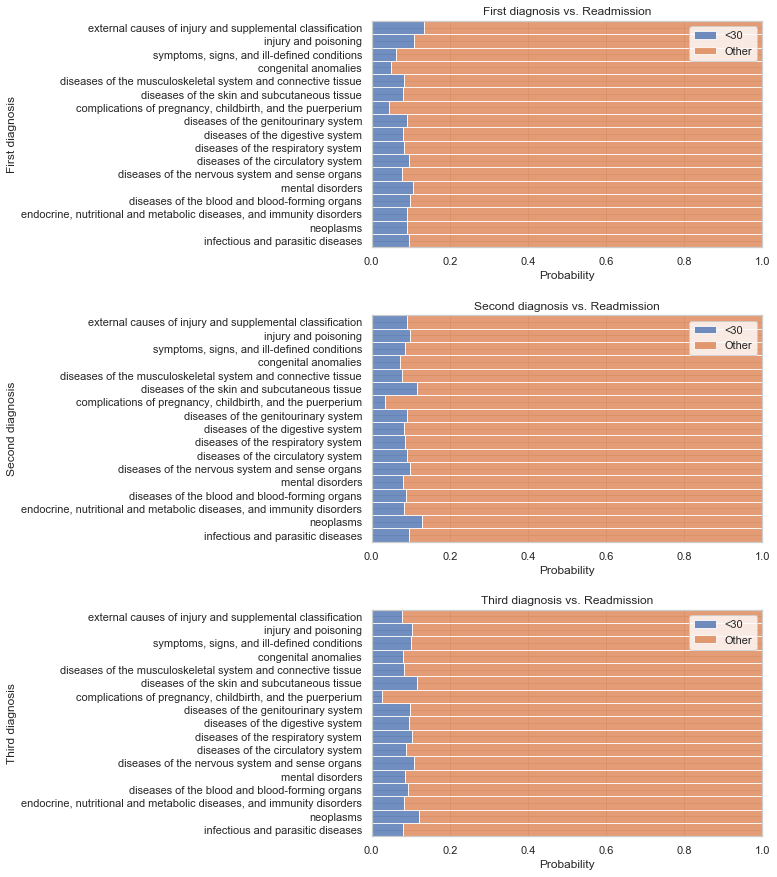

In [55]:
fig, axs = plt.subplots(3,1, figsize=(7,15))
PlotChance(df,'diag_1','readmitted', 'First diagnosis', 'Readmission', ax=axs[0])
PlotChance(df,'diag_2','readmitted', 'Second diagnosis', 'Readmission', ax=axs[1])
PlotChance(df,'diag_3','readmitted', 'Third diagnosis', 'Readmission', ax=axs[2])
fig.subplots_adjust(hspace=0.3)

Complications of pregnancy lead to little early readmission.
External causes as first diagnosis lead to the most of early readmissions.
In second and third diagnosis the biggest probability of early readmission have neoplasms, diseases of skin, and injury and poisoning.

In all cases probability of readmission varies substantially p-value of chi square test is really small.

In [56]:
df['number_diagnoses'].value_counts()

9     30703
5      8880
6      7566
7      7485
8      7391
4      4441
3      2357
2       881
1       193
16       30
13       10
10        9
15        7
12        6
11        6
14        5
Name: number_diagnoses, dtype: int64

Text(0.5, 1.0, 'Count of readmission by number of diagnoses')


Independece test for variables number_diagnoses and readmitted
readmitted         <30  Other
number_diagnoses             
1                    6    187
2                   41    840
3                  140   2217
4                  301   4140
5                  684   8196
6                  649   6917
7                  645   6840
8                  722   6669
9                 3089  27687
Variable number_diagnoses is not ordered.
Result for nominal (chi2) association.
chi2_stat: 1.495684e+02, chi2_thresh: 1.550731e+01, dof: 8.000000e+00, p-value: 0.000000e+00


1

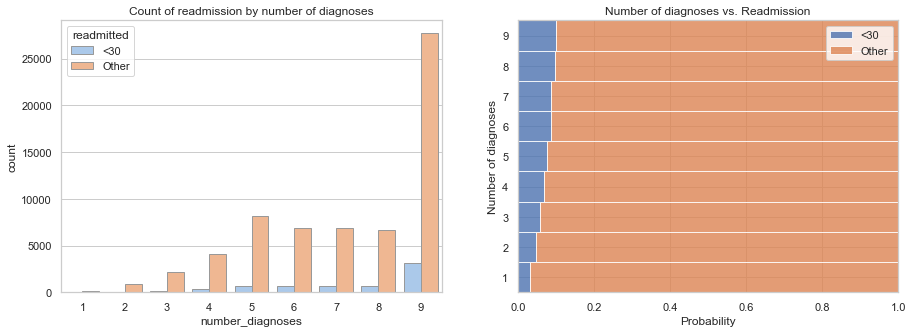

In [57]:
df.loc[df['number_diagnoses']>9, 'number_diagnoses'] = 9
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='number_diagnoses', hue='readmitted', palette='pastel', edgecolor='.6',
            data=df, ax=axs[0])
axs[0].set_title("Count of readmission by number of diagnoses")
PlotChance(df,'number_diagnoses','readmitted', 'Number of diagnoses', 'Readmission', ax=axs[1])
IndependenceTest(df, 'number_diagnoses', 'readmitted')

Chance of readmission increases with the number of diagnoses.  
Now let's handle the rest of the data, so the usage of specyfic tests/medicines.

In [58]:
med_l = ['max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'] 
med_res = []
for cl in med_l:
    print("\nTest for: {:s}".format(cl))
    df[cl].value_counts()
    df.loc[:,cl] = df[cl].astype('category')
    test = IndependenceTest(df, cl, 'readmitted')
    med_res.append([cl, test])


Test for: max_glu_serum


None    66622
Norm     1700
>200      936
>300      712
Name: max_glu_serum, dtype: int64


Independece test for variables max_glu_serum and readmitted
readmitted      <30  Other
max_glu_serum             
>200            102    834
>300             72    640
None           5937  60685
Norm            166   1534
Variable max_glu_serum is not ordered.
Result for nominal (chi2) association.
chi2_stat: 6.990035e+00, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 7.221608e-02

Test for: A1Cresult


None    57125
>8       6239
Norm     3741
>7       2865
Name: A1Cresult, dtype: int64


Independece test for variables A1Cresult and readmitted
readmitted   <30  Other
A1Cresult              
>7           246   2619
>8           509   5730
None        5199  51926
Norm         323   3418
Variable A1Cresult is not ordered.
Result for nominal (chi2) association.
chi2_stat: 7.268362e+00, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 6.381865e-02

Test for: metformin


No        55068
Steady    13633
Up          834
Down        435
Name: metformin, dtype: int64


Independece test for variables metformin and readmitted
readmitted   <30  Other
metformin              
Down          44    391
No          5040  50028
Steady      1135  12498
Up            58    776
Variable metformin is not ordered.
Result for nominal (chi2) association.
chi2_stat: 1.402570e+01, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 2.870383e-03

Test for: repaglinide


No        69053
Steady      818
Up           71
Down         28
Name: repaglinide, dtype: int64


Independece test for variables repaglinide and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted    <30  Other
repaglinide             
Down            1     27
No           6163  62890
Steady         98    720
Up             15     56
Variable repaglinide is not ordered.
Result for nominal (chi2) association.
chi2_stat: 2.309743e+01, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 3.853796e-05

Test for: nateglinide


No        69479
Steady      467
Up           16
Down          8
Name: nateglinide, dtype: int64


Independece test for variables nateglinide and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted    <30  Other
nateglinide             
Down            0      8
No           6239  63240
Steady         38    429
Up              0     16
Variable nateglinide is not ordered.
Result for nominal (chi2) association.
chi2_stat: 1.216228e+00, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 7.491149e-01

Test for: chlorpropamide


No        69899
Steady       66
Up            4
Down          1
Name: chlorpropamide, dtype: int64


Independece test for variables chlorpropamide and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted       <30  Other
chlorpropamide             
Down               0      1
No              6274  63625
Steady             3     63
Up                 0      4
Variable chlorpropamide is not ordered.
Result for nominal (chi2) association.
chi2_stat: 2.699843e+00, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 4.402539e-01

Test for: glimepiride


No        66273
Steady     3331
Up          230
Down        136
Name: glimepiride, dtype: int64


Independece test for variables glimepiride and readmitted
readmitted    <30  Other
glimepiride             
Down           18    118
No           5953  60320
Steady        283   3048
Up             23    207
Variable glimepiride is not ordered.
Result for nominal (chi2) association.
chi2_stat: 4.257962e+00, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 2.349224e-01

Test for: acetohexamide


No        69969
Steady        1
Name: acetohexamide, dtype: int64


Independece test for variables acetohexamide and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted      <30  Other
acetohexamide             
No             6277  63692
Steady            0      1
Variable acetohexamide is not ordered.
Result for nominal (chi2) association.
chi2_stat: 1.090102e+00, chi2_thresh: 3.841459e+00, dof: 1.000000e+00, p-value: 2.964486e-01

Test for: glipizide


No        60964
Steady     8062
Up          573
Down        371
Name: glipizide, dtype: int64


Independece test for variables glipizide and readmitted
readmitted   <30  Other
glipizide              
Down          48    323
No          5400  55564
Steady       766   7296
Up            63    510
Variable glipizide is not ordered.
Result for nominal (chi2) association.
chi2_stat: 1.375887e+01, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 3.252435e-03

Test for: glyburide


No        62195
Steady     6744
Up          613
Down        418
Name: glyburide, dtype: int64


Independece test for variables glyburide and readmitted
readmitted   <30  Other
glyburide              
Down          40    378
No          5548  56647
Steady       630   6114
Up            59    554
Variable glyburide is not ordered.
Result for nominal (chi2) association.
chi2_stat: 1.834150e+00, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 6.075318e-01

Test for: tolbutamide


No        69953
Steady       17
Name: tolbutamide, dtype: int64


Independece test for variables tolbutamide and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted    <30  Other
tolbutamide             
No           6276  63677
Steady          1     16
Variable tolbutamide is not ordered.
Result for nominal (chi2) association.
chi2_stat: 1.986403e-01, chi2_thresh: 3.841459e+00, dof: 1.000000e+00, p-value: 6.558206e-01

Test for: pioglitazone


No        64708
Steady     5003
Up          178
Down         81
Name: pioglitazone, dtype: int64


Independece test for variables pioglitazone and readmitted
readmitted     <30  Other
pioglitazone             
Down             9     72
No            5818  58890
Steady         429   4574
Up              21    157
Variable pioglitazone is not ordered.
Result for nominal (chi2) association.
chi2_stat: 3.189641e+00, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 3.633002e-01

Test for: rosiglitazone


No        65310
Steady     4454
Up          132
Down         74
Name: rosiglitazone, dtype: int64


Independece test for variables rosiglitazone and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted      <30  Other
rosiglitazone             
Down              4     70
No             5867  59443
Steady          393   4061
Up               13    119
Variable rosiglitazone is not ordered.
Result for nominal (chi2) association.
chi2_stat: 1.407257e+00, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 7.038344e-01

Test for: acarbose


No        69770
Steady      190
Up           10
Name: acarbose, dtype: int64


Independece test for variables acarbose and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted   <30  Other
acarbose               
No          6262  63508
Steady        13    177
Up             2      8
Variable acarbose is not ordered.
Result for nominal (chi2) association.
chi2_stat: 2.545539e+00, chi2_thresh: 5.991465e+00, dof: 2.000000e+00, p-value: 2.800550e-01

Test for: miglitol


No        69950
Steady       18
Up            1
Down          1
Name: miglitol, dtype: int64


Independece test for variables miglitol and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted   <30  Other
miglitol               
Down           0      1
No          6276  63674
Steady         1     17
Up             0      1
Variable miglitol is not ordered.
Result for nominal (chi2) association.
chi2_stat: 2.437188e+00, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 4.867497e-01

Test for: troglitazone


No        69967
Steady        3
Name: troglitazone, dtype: int64


Independece test for variables troglitazone and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted     <30  Other
troglitazone             
No            6277  63690
Steady           0      3
Variable troglitazone is not ordered.
Result for nominal (chi2) association.
chi2_stat: 1.210311e-01, chi2_thresh: 3.841459e+00, dof: 1.000000e+00, p-value: 7.279189e-01

Test for: tolazamide


No        69940
Steady       30
Name: tolazamide, dtype: int64


Independece test for variables tolazamide and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted   <30  Other
tolazamide             
No          6276  63664
Steady         1     29
Variable tolazamide is not ordered.
Result for nominal (chi2) association.
chi2_stat: 1.168111e+00, chi2_thresh: 3.841459e+00, dof: 1.000000e+00, p-value: 2.797896e-01

Test for: examide


No    69970
Name: examide, dtype: int64


Independece test for variables examide and readmitted
readmitted   <30  Other
examide                
No          6277  63693
Variable examide is not ordered.
Result for nominal (chi2) association.
chi2_stat: 0.000000e+00, chi2_thresh: nan, dof: 0.000000e+00, p-value: nan

Test for: citoglipton


No    69970
Name: citoglipton, dtype: int64


Independece test for variables citoglipton and readmitted
readmitted    <30  Other
citoglipton             
No           6277  63693
Variable citoglipton is not ordered.
Result for nominal (chi2) association.
chi2_stat: 0.000000e+00, chi2_thresh: nan, dof: 0.000000e+00, p-value: nan

Test for: insulin


No        34255
Steady    21617
Down       7321
Up         6777
Name: insulin, dtype: int64


Independece test for variables insulin and readmitted
readmitted   <30  Other
insulin                
Down         772   6549
No          2837  31418
Steady      2001  19616
Up           667   6110
Variable insulin is not ordered.
Result for nominal (chi2) association.
chi2_stat: 5.058062e+01, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 6.009471e-11

Test for: glyburide-metformin


No        69474
Steady      485
Up            7
Down          4
Name: glyburide-metformin, dtype: int64


Independece test for variables glyburide-metformin and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted            <30  Other
glyburide-metformin             
Down                    1      3
No                   6238  63236
Steady                 38    447
Up                      0      7
Variable glyburide-metformin is not ordered.
Result for nominal (chi2) association.
chi2_stat: 2.078774e+00, chi2_thresh: 7.814728e+00, dof: 3.000000e+00, p-value: 5.562189e-01

Test for: glipizide-metformin


No        69963
Steady        7
Name: glipizide-metformin, dtype: int64


Independece test for variables glipizide-metformin and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted            <30  Other
glipizide-metformin             
No                   6277  63686
Steady                  0      7
Variable glipizide-metformin is not ordered.
Result for nominal (chi2) association.
chi2_stat: 4.879670e-02, chi2_thresh: 3.841459e+00, dof: 1.000000e+00, p-value: 8.251705e-01

Test for: glimepiride-pioglitazone


No    69970
Name: glimepiride-pioglitazone, dtype: int64


Independece test for variables glimepiride-pioglitazone and readmitted
readmitted                 <30  Other
glimepiride-pioglitazone             
No                        6277  63693
Variable glimepiride-pioglitazone is not ordered.
Result for nominal (chi2) association.
chi2_stat: 0.000000e+00, chi2_thresh: nan, dof: 0.000000e+00, p-value: nan

Test for: metformin-rosiglitazone


No        69968
Steady        2
Name: metformin-rosiglitazone, dtype: int64


Independece test for variables metformin-rosiglitazone and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted                <30  Other
metformin-rosiglitazone             
No                       6277  63691
Steady                      0      2
Variable metformin-rosiglitazone is not ordered.
Result for nominal (chi2) association.
chi2_stat: 3.723309e-01, chi2_thresh: 3.841459e+00, dof: 1.000000e+00, p-value: 5.417365e-01

Test for: metformin-pioglitazone


No        69969
Steady        1
Name: metformin-pioglitazone, dtype: int64


Independece test for variables metformin-pioglitazone and readmitted
Independence test should not be performed because not all frequencies are bigger than 5:
readmitted               <30  Other
metformin-pioglitazone             
No                      6277  63692
Steady                     0      1
Variable metformin-pioglitazone is not ordered.
Result for nominal (chi2) association.
chi2_stat: 1.090102e+00, chi2_thresh: 3.841459e+00, dof: 1.000000e+00, p-value: 2.964486e-01


Variables to delete: ['acetohexamide', 'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'].  
Variables to add missing categories: ['acarbose']

In [59]:
df.drop(['acetohexamide', 'tolbutamide', 'miglitol', 'troglitazone',
         'tolazamide', 'examide', 'citoglipton', 'glipizide-metformin',
         'glimepiride-pioglitazone', 'metformin-rosiglitazone',
         'metformin-pioglitazone'], axis=1, inplace=True)
df['acarbose'] = df['acarbose'].cat.add_categories(['Down'])

In [60]:
df['change'].value_counts()

No    38481
Ch    31489
Name: change, dtype: int64

Text(0.5, 1.0, 'Count of readmission by change')


Independece test for variables change and readmitted
readmitted   <30  Other
change                 
Ch          2971  28518
No          3306  35175
Variable change is not ordered.
Result for nominal (chi2) association.
chi2_stat: 1.509871e+01, chi2_thresh: 3.841459e+00, dof: 1.000000e+00, p-value: 1.020328e-04


1

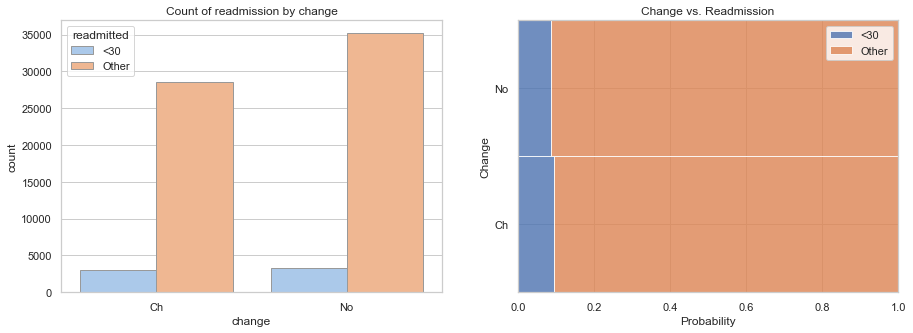

In [61]:
df.loc[:,'change'] = df['change'].astype('category')

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='change', hue='readmitted', palette='pastel', edgecolor='.6',
            data=df, ax=axs[0])
axs[0].set_title("Count of readmission by change")
PlotChance(df,'change','readmitted', 'Change', 'Readmission', ax=axs[1])
IndependenceTest(df, 'change', 'readmitted')

H_0 can be rejected.

In [62]:
df['diabetesMed'].value_counts()

Yes    53291
No     16679
Name: diabetesMed, dtype: int64

Text(0.5, 1.0, 'Count of readmission by diabetes medication')


Independece test for variables diabetesMed and readmitted
readmitted    <30  Other
diabetesMed             
No           1259  15420
Yes          5018  48273
Variable diabetesMed is not ordered.
Result for nominal (chi2) association.
chi2_stat: 5.426968e+01, chi2_thresh: 3.841459e+00, dof: 1.000000e+00, p-value: 1.747491e-13


1

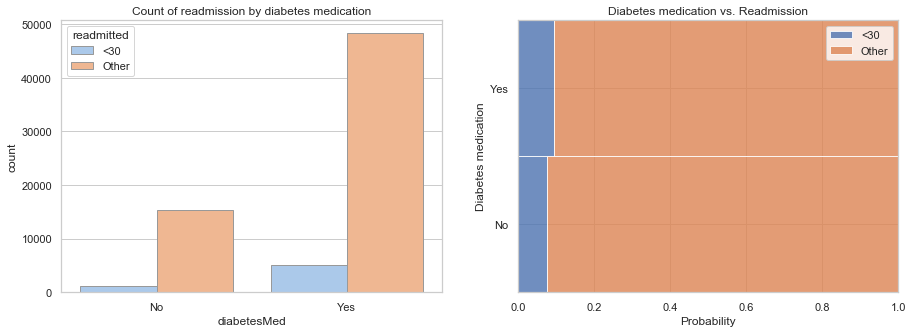

In [63]:
df.loc[:,'diabetesMed'] = df['diabetesMed'].astype('category')

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='diabetesMed', hue='readmitted', palette='pastel', edgecolor='.6',
            data=df, ax=axs[0])
axs[0].set_title("Count of readmission by diabetes medication")
PlotChance(df,'diabetesMed','readmitted', 'Diabetes medication', 'Readmission', ax=axs[1])
IndependenceTest(df, 'diabetesMed', 'readmitted')

### Feature engineering
It's time to encode data for modeling.

In [64]:
df.columns

Index(['race', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'insulin', 'glyburide-metformin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [65]:
db = pd.get_dummies(df['race'], prefix='race')
db['age'] = df['age'].cat.codes
db = db.join(pd.get_dummies(df['admission_type_id'], prefix='admission_type_id'))
db = db.join(pd.get_dummies(df['discharge_disposition_id'], prefix='discharge_disposition_id'))
db = db.join(pd.get_dummies(df['admission_source_id'], prefix='admission_source_id'))
db['time_in_hospital'] = df['time_in_hospital']
db = db.join(pd.get_dummies(df['medical_specialty'], prefix='medical_specialty'))
db['num_lab_procedures'] = df['num_lab_procedures']
db['num_procedures'] = df['num_procedures']
db['num_medications'] = df['num_medications']
db['number_outpatient'] = df['number_outpatient']
db['number_emergency'] = df['number_emergency']
db['number_inpatient'] = df['number_inpatient']
db = db.join(pd.get_dummies(df['diag_1'], prefix='diag_1'))
db = db.join(pd.get_dummies(df['diag_2'], prefix='diag_2'))
db = db.join(pd.get_dummies(df['diag_3'], prefix='diag_3'))
db['number_diagnoses'] = df['number_diagnoses']
db = db.join(pd.get_dummies(df['max_glu_serum'], prefix='max_glu_serum'))
db = db.join(pd.get_dummies(df['A1Cresult'], prefix='A1Cresult'))
db = db.join(pd.get_dummies(df['metformin'], prefix='metformin'))
db = db.join(pd.get_dummies(df['repaglinide'], prefix='repaglinide'))
db = db.join(pd.get_dummies(df['nateglinide'], prefix='nateglinide'))
db = db.join(pd.get_dummies(df['chlorpropamide'], prefix='chlorpropamide'))
db = db.join(pd.get_dummies(df['glimepiride'], prefix='glimepiride'))
db = db.join(pd.get_dummies(df['glipizide'], prefix='glipizide'))
db = db.join(pd.get_dummies(df['glyburide'], prefix='glyburide'))
db = db.join(pd.get_dummies(df['pioglitazone'], prefix='pioglitazone'))
db = db.join(pd.get_dummies(df['rosiglitazone'], prefix='rosiglitazone'))
db = db.join(pd.get_dummies(df['acarbose'], prefix='acarbose'))
db = db.join(pd.get_dummies(df['insulin'], prefix='insulin'))
db = db.join(pd.get_dummies(df['glyburide-metformin'], prefix='glyburide-metformin'))
db = db.join(pd.get_dummies(df['change'], prefix='change'))
db = db.join(pd.get_dummies(df['diabetesMed'], prefix='diabetesMed'))
db['readmitted'] = 1 - df['readmitted'].cat.codes
df = db

Time for models training.

In [66]:
df

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,age,admission_type_id_1,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_3,admission_source_id_1,admission_source_id_2,admission_source_id_3,admission_source_id_4,time_in_hospital,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_Gastroenterology,...,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,acarbose_Down,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0
1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,3,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
2,1,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
3,0,0,1,0,0,0,3,1,0,0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
4,0,0,1,0,0,0,4,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,0,0,1,0,0,0,7,1,0,0,0,0,1,0,0,0,1,0,0,9,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
101755,0,0,0,0,1,0,4,1,0,0,0,0,1,0,0,0,1,0,0,14,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
101756,0,0,0,0,1,0,6,1,0,0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
101758,0,0,1,0,0,0,8,1,0,0,0,0,1,0,0,0,1,0,0,5,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0


### Train test split

In [67]:
#Split data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

ran = 1000
X = df.loc[:, df.columns != 'readmitted']
y = df.loc[:, df.columns == 'readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=ran, stratify=y)

In [68]:
#Let's first make a preprocessor for numerical features
from sklearn.compose import ColumnTransformer

minmax_cl = ['time_in_hospital', 'num_procedures', 'number_emergency',
            'number_outpatient', 'number_inpatient', 'number_diagnoses']


robust_cl = ['num_lab_procedures', 'num_medications']

preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), minmax_cl),
        ('robust', RobustScaler(), robust_cl)]
    , remainder='passthrough'
)

### Logistic regression

In [69]:
pipe_lr = Pipeline(steps=[('pre', preprocessor),('lr', LogisticRegression(max_iter=10000, penalty='l2'))])
params = {
 'lr__C': [0.001, 0.001, 0.01, 0.1, 1.0, 10., 100., 1000., 1000]
     }
grid_search = GridSearchCV(pipe_lr, scoring='f1',
                           param_grid = params, return_train_score =True, n_jobs = 8, cv=5, verbose=1)
grid_search.fit(X_train, y_train.values.ravel())
print('Logistic regression. Train data: {:.3f}, test data: {:.3f}'.format(grid_search.best_score_, 
                                                             grid_search.score(X_test, y_test)))
#Not bad but let's check recall and precision
lr=grid_search.best_estimator_
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print('Accuracy score is: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score is: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall score is: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1 score is: {:.3f}'.format(f1_score(y_test, y_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed:  3.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('minmax',
                                                                         MinMaxScaler(),
                                                                         ['time_in_hospital',
                                                                          'num_procedures',
                                                                          'number_emergency',
                                                                          'number_outpatient',
                                                                          'number_inpatient',
                                                                          'number_diagnoses']),
                                                                        ('robust',
                               

Logistic regression. Train data: 0.011, test data: 0.013
Accuracy score is: 0.910
Precision score is: 0.500
Recall score is: 0.006
F1 score is: 0.013
Confusion matrix:
[[15914    10]
 [ 1559    10]]


The performance is terrible because the dataset is highly imbalanced. Data size is big so we can use undersampling.

In [70]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss

pipe_lr = Pipeline([('pre', preprocessor),('nm', NearMiss(version=1)),('lr', LogisticRegression(max_iter=10000, penalty='l2'))])
params = {
 'lr__C': [0.001, 0.001, 0.01, 0.1, 1.0, 10., 100., 1000., 1000]
     }
grid_search = GridSearchCV(pipe_lr, scoring='f1',
                           param_grid = params, return_train_score =True, n_jobs = 8, cv=5, verbose=1)
grid_search.fit(X_train, y_train.values.ravel())
print('Logistic regression. Train data: {:.3f}, test data: {:.3f}'.format(grid_search.best_score_, 
                                                             grid_search.score(X_test, y_test)))
#Not bad but let's check recall and precision
grid_search.best_params_
lr=grid_search.best_estimator_
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print('Accuracy score is: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score is: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall score is: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1 score is: {:.3f}'.format(f1_score(y_test, y_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed: 12.8min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('minmax',
                                                                         MinMaxScaler(),
                                                                         ['time_in_hospital',
                                                                          'num_procedures',
                                                                          'number_emergency',
                                                                          'number_outpatient',
                                                                          'number_inpatient',
                                                                          'number_diagnoses']),
                                                                        ('robust',
                               

Logistic regression. Train data: 0.166, test data: 0.169


{'lr__C': 0.001}

Accuracy score is: 0.322
Precision score is: 0.095
Recall score is: 0.769
F1 score is: 0.169
Confusion matrix:
[[ 4422 11502]
 [  363  1206]]


Recall and f1 score has improved but at a cost or precision.  
Let's see how perform a more advanced classifiers.

### Support Vector Machines

In [71]:
from sklearn.svm import SVC

svc_pipe = Pipeline(steps=[('pre', preprocessor), ('nm', NearMiss(version=1)), ('svc', SVC(probability=True))])

params = {
 'svc__C': np.geomspace(0.0001, 100, num=7),
 'svc__gamma': [0.000001, 0.00001, 0.0001, 0.001, 'auto']
     }

grid_search = GridSearchCV(svc_pipe, scoring='f1',
                           param_grid = params, return_train_score =True, n_jobs = 8, cv=5, verbose=10)
grid_search.fit(X_train, y_train)
print('Score, train data: {:.3f}, test data: {:.3f}'.format(grid_search.best_score_, 
                                                              grid_search.score(X_test, y_test)))
grid_search.best_params_
svc = grid_search.best_estimator_
y_pred = svc.predict(X_test)
print('Accuracy score is: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score is: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall score is: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1 score is: {:.3f}'.format(f1_score(y_test, y_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed: 12.8min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed: 24.5min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed: 25.0min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed: 47.6min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 59.7min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed: 72.3min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed: 84.4min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed: 107.6min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed: 130.9min
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed: 150.4min
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed: 166.1min
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed: 190.2min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed: 205.0min
[Parallel(n_jobs=8)]: Done 175 out of 175 | elapsed: 230.3min finished
/home/ing3lo/anaconda3/lib/python3.8/site-packages/skle

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('minmax',
                                                                         MinMaxScaler(),
                                                                         ['time_in_hospital',
                                                                          'num_procedures',
                                                                          'number_emergency',
                                                                          'number_outpatient',
                                                                          'number_inpatient',
                                                                          'number_diagnoses']),
                                                                        ('robust',
                               

Score, train data: 0.165, test data: 0.165


{'svc__C': 100.0, 'svc__gamma': 'auto'}

Accuracy score is: 0.275
Precision score is: 0.092
Recall score is: 0.800
F1 score is: 0.165
Confusion matrix:
[[ 3556 12368]
 [  314  1255]]


For SVM instead of undersampling the data, weights for a given class may be applied. It modifies regularization parameter for a given class following: C(i) = class_weight(i)*C.

In [72]:
#%% SVM classification
from sklearn.svm import SVC
import joblib

svc_pipe = Pipeline(steps=[('pre', preprocessor), ('svc', SVC(probability=True))])

#calculation takes too long (over 24h) so instead or redoing the grid search
#previosuly done and saved results are be resued

#params = {
# 'svc__C': np.geomspace(0.0001, 100, num=7),
# 'svc__gamma': [0.000001, 0.00001, 0.0001, 0.001, 'auto'],
#  'svc__class_weight': [{0:1,1:1}, {0:1,1:10}, {0:1,1:100}, {0:1,1:1000}]
#     }
#grid_search = GridSearchCV(svc_pipe, scoring='f1',
#                           param_grid = params, return_train_score =True, n_jobs = 8, cv=5, verbose=10)
#grid_search.fit(X_train, y_train.values.ravel())
#print('Score, train data: {:.3f}, test data: {:.3f}'.format(grid_search.best_score_, 
#                                                              grid_search.score(X_test, y_test)))
#joblib.dump(grid_search.best_estimator_, 'svm_gs.pkl', compress=1)
#svc = grid_search.best_estimator_

svc = joblib.load("svm_gs.pkl")
y_pred = svc.predict(X_test)
print('Accuracy score is: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score is: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall score is: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1 score is: {:.3f}'.format(f1_score(y_test, y_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

Accuracy score is: 0.707
Precision score is: 0.123
Recall score is: 0.372
F1 score is: 0.185
Confusion matrix:
[[11781  4143]
 [  986   583]]


Performance improved when compared to undersampling.

### Random Forest Classification

In [73]:
#%% Random forest classification can also be weighted but for a sake of time first we will use undersampling
from sklearn.ensemble import RandomForestClassifier

rfc_pipe = Pipeline(steps=[('nm', NearMiss(version=1)), ('rfc', RandomForestClassifier(n_estimators=1000))])

params = {
 'rfc__max_depth': [3, 4, 5, 8, 10],
 'rfc__max_features': [5, 8, 10, 'auto', 15, 20, 30]
     }

grid_search = GridSearchCV(rfc_pipe, scoring='f1',
                           param_grid = params, return_train_score =True, n_jobs = 8, verbose = 10)
grid_search.fit(X_train, y_train)
print('Score, train data: {:.3f}, test data: {:.3f}'.format(grid_search.best_score_, 
                                                              grid_search.score(X_test, y_test)))
grid_search.best_params_
rfc = grid_search.best_estimator_
y_pred = rfc.predict(X_test)
print('Accuracy score is: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score is: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall score is: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1 score is: {:.3f}'.format(f1_score(y_test, y_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   42.9s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  5.3min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:  6.7min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:  8.2min
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:  9.8min
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed: 11.2min
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed: 13.8min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed: 16.1min
[Parallel(n_jobs=8)]: Done 175 out of 175 | elapsed: 19.9min finished
/home/ing3lo/anaconda3/lib/python3.8/site-packages/imblearn/pi

GridSearchCV(estimator=Pipeline(steps=[('nm', NearMiss()),
                                       ('rfc',
                                        RandomForestClassifier(n_estimators=1000))]),
             n_jobs=8,
             param_grid={'rfc__max_depth': [3, 4, 5, 8, 10],
                         'rfc__max_features': [5, 8, 10, 'auto', 15, 20, 30]},
             return_train_score=True, scoring='f1', verbose=10)

Score, train data: 0.171, test data: 0.171


{'rfc__max_depth': 10, 'rfc__max_features': 15}

Accuracy score is: 0.364
Precision score is: 0.097
Recall score is: 0.734
F1 score is: 0.171
Confusion matrix:
[[ 5208 10716]
 [  417  1152]]


This one performse worse than SVM with weights prescribed to class.

In [74]:
#%% Let's only try a grid search with the 'balanced' weight
from sklearn.ensemble import RandomForestClassifier

rfc_pipe = Pipeline(steps=[('rfc', RandomForestClassifier(n_estimators=1000, class_weight='balanced'))])


params = {
 'rfc__max_depth': [3, 4, 5, 8, 10],
 'rfc__max_features': [5, 8, 10, 'auto', 15, 20, 30]
     }

grid_search = GridSearchCV(rfc_pipe, scoring='f1',
                           param_grid = params, return_train_score =True, n_jobs = 8, verbose = 10)
grid_search.fit(X_train, y_train)
print('Score, train data: {:.3f}, test data: {:.3f}'.format(grid_search.best_score_, 
                                                              grid_search.score(X_test, y_test)))
grid_search.best_params_
rfc = grid_search.best_estimator_
y_pred = rfc.predict(X_test)
print('Accuracy score is: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score is: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall score is: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1 score is: {:.3f}'.format(f1_score(y_test, y_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   38.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  5.7min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  7.0min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:  9.5min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed: 11.3min
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed: 14.4min
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed: 17.5min
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed: 21.7min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed: 26.7min
[Parallel(n_jobs=8)]: Done 175 out of 175 | elapsed: 36.9min finished
/home/ing3lo/anaconda3/lib/python3.8/site-packages/imblearn/pi

GridSearchCV(estimator=Pipeline(steps=[('rfc',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_estimators=1000))]),
             n_jobs=8,
             param_grid={'rfc__max_depth': [3, 4, 5, 8, 10],
                         'rfc__max_features': [5, 8, 10, 'auto', 15, 20, 30]},
             return_train_score=True, scoring='f1', verbose=10)

Score, train data: 0.217, test data: 0.212


{'rfc__max_depth': 8, 'rfc__max_features': 5}

Accuracy score is: 0.642
Precision score is: 0.132
Recall score is: 0.537
F1 score is: 0.212
Confusion matrix:
[[10397  5527]
 [  727   842]]


Much better performance than predecessors in both recall and precision.

### Gradient boosted classification

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_pipe = Pipeline(steps=[('nm', NearMiss(version=1)), ('gbc', GradientBoostingClassifier(n_estimators=1000))])

params = {
 'gbc__learning_rate': [0.000001, 0.00001, 0.0001, 0.001],
 'gbc__max_depth': [3, 4, 5, 8, 10],
 'gbc__max_features': [5, 8, 10, 'auto', 15, 20]
     }

grid_search = GridSearchCV(gbc_pipe, scoring='f1',
                           param_grid = params, return_train_score =True, n_jobs = 8, verbose=10)
grid_search.fit(X_train, y_train)
print('Score, train data: {:.3f}, test data: {:.3f}'.format(grid_search.best_score_, 
                                                              grid_search.score(X_test, y_test)))
grid_search.best_params_
gbc = grid_search.best_estimator_
y_pred = gbc.predict(X_test)
print('Accuracy score is: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score is: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall score is: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1 score is: {:.3f}'.format(f1_score(y_test, y_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   41.7s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  4.1min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  5.3min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  7.2min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:  8.7min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed: 11.6min
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed: 13.9min
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed: 18.7min
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed: 22.8min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed: 29.5min
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed: 31.9min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 34.2min
[Parallel(

GridSearchCV(estimator=Pipeline(steps=[('nm', NearMiss()),
                                       ('gbc',
                                        GradientBoostingClassifier(n_estimators=1000))]),
             n_jobs=8,
             param_grid={'gbc__learning_rate': [1e-06, 1e-05, 0.0001, 0.001],
                         'gbc__max_depth': [3, 4, 5, 8, 10],
                         'gbc__max_features': [5, 8, 10, 'auto', 15, 20]},
             return_train_score=True, scoring='f1', verbose=10)

Score, train data: 0.175, test data: 0.184


{'gbc__learning_rate': 1e-06, 'gbc__max_depth': 4, 'gbc__max_features': 'auto'}

Accuracy score is: 0.546
Precision score is: 0.110
Recall score is: 0.570
F1 score is: 0.184
Confusion matrix:
[[8654 7270]
 [ 675  894]]


Gradient Boosted classifier gives worse performance for both recall and f1-score than Random Forest.  
Gradient Boosted classifier by default with each iteration corrects error from the previous so it should handle imbalance without undersampling. Let's investigate if it is true for out dataset.

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_pipe = Pipeline(steps=[('gbc', GradientBoostingClassifier(n_estimators=1000))])

params = {
 'gbc__learning_rate': [0.000001, 0.00001, 0.0001, 0.001],
 'gbc__max_depth': [3, 4, 5, 8, 10],
 'gbc__max_features': [5, 8, 10, 'auto', 15, 20]
     }

grid_search = GridSearchCV(gbc_pipe, scoring='f1',
                           param_grid = params, return_train_score =True, n_jobs = 8, verbose=10)
grid_search.fit(X_train, y_train)
print('Score, train data: {:.3f}, test data: {:.3f}'.format(grid_search.best_score_, 
                                                              grid_search.score(X_test, y_test)))
grid_search.best_params_
gbc = grid_search.best_estimator_
y_pred = gbc.predict(X_test)
print('Accuracy score is: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score is: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall score is: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1 score is: {:.3f}'.format(f1_score(y_test, y_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   43.8s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  6.4min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  9.5min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed: 11.3min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed: 18.1min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed: 22.3min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed: 30.2min
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed: 37.9min
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed: 52.1min
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed: 66.9min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed: 87.6min
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed: 99.6min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 103.9min
[Parallel

GridSearchCV(estimator=Pipeline(steps=[('gbc',
                                        GradientBoostingClassifier(n_estimators=1000))]),
             n_jobs=8,
             param_grid={'gbc__learning_rate': [1e-06, 1e-05, 0.0001, 0.001],
                         'gbc__max_depth': [3, 4, 5, 8, 10],
                         'gbc__max_features': [5, 8, 10, 'auto', 15, 20]},
             return_train_score=True, scoring='f1', verbose=10)

Score, train data: 0.002, test data: 0.004


{'gbc__learning_rate': 0.001,
 'gbc__max_depth': 10,
 'gbc__max_features': 'auto'}

Accuracy score is: 0.910
Precision score is: 0.300
Recall score is: 0.002
F1 score is: 0.004
Confusion matrix:
[[15917     7]
 [ 1566     3]]


The performance is much worse. Inspection of the data in EDA indicates that there is only few features with several categories that indicate in above 50% that the patient will be readmitted (e.g., number of inpatient above 10), whereas most of them oscilates around the baseline which is above 11%. This means that tree algorithm categorizes most of the features and categories as indication of belonging to outcome 'Other'. In that way, for the full sample size, even Gradient Boosting algorithm is not able to find solution with the increased f1-score. With undersampling this problem does not occur, and therefore better performance for f1 metric is obtained.

### Naive Bayes

In [77]:
#%% Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score

pipe_0 = Pipeline(steps=[ ('gnb', GaussianNB())])
pipe_qt = Pipeline(steps=[('qt', QuantileTransformer(output_distribution='normal')), ('gnb', GaussianNB())])
pipe_pt = Pipeline(steps=[('pt', PowerTransformer()), ('gnb', GaussianNB())])

scores_0 = cross_val_score(pipe_0, X_train, y_train, cv=5, scoring='roc_auc', n_jobs = 8)
scores_qt = cross_val_score(pipe_qt, X_train, y_train, cv=5, scoring='roc_auc', n_jobs = 8)
scores_pt = cross_val_score(pipe_pt, X_train, y_train, cv=5, scoring='roc_auc', n_jobs = 8)

print('No transform score, cross-val mean: {:.3f}'.format(scores_0.mean()))
print('Qunatile transform score, cross-val mean: {:.3f}'.format(scores_qt.mean()))
print('Power transform score, cross-val mean: {:.3f}'.format(scores_pt.mean()))

pipe_0.fit(X_train, y_train.values.ravel())
pipe_qt.fit(X_train, y_train.values.ravel())
pipe_pt.fit(X_train, y_train.values.ravel())

print('\nNo transormation GaussianNB:')
y_pred = pipe_0.predict(X_test)
print('Accuracy score is: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score is: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall score is: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1 score is: {:.3f}'.format(f1_score(y_test, y_pred)))

No transform score, cross-val mean: 0.594
Qunatile transform score, cross-val mean: 0.518
Power transform score, cross-val mean: 0.509


Pipeline(steps=[('gnb', GaussianNB())])

Pipeline(steps=[('qt', QuantileTransformer(output_distribution='normal')),
                ('gnb', GaussianNB())])

/home/ing3lo/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/ing3lo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/ing3lo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


Pipeline(steps=[('pt', PowerTransformer()), ('gnb', GaussianNB())])


No transormation GaussianNB:
Accuracy score is: 0.155
Precision score is: 0.091
Recall score is: 0.935
F1 score is: 0.166


For presented data the best performance was obtained for Random Forest with undersampling. The results are far from satisfying. Nevertheless, for this dataset better results seem to be intractable.